# Applying supervised learning to predict student dropout

---

# 📌 Project Brief

---

## Business context

Educational institutions face major financial and reputational challenges from high student dropout rates. Understanding which students are at risk of leaving early allows for earlier intervention and improved retention.

This project explores a real-world dataset from Study Group, broken into three phases:

1. Applicant and course information  
2. Student and engagement data  
3. Academic performance data

Each phase reflects the progression of data availability during the student journey.

## Objective

The goal is to build a predictive model for student dropout using supervised learning. You’ll perform data exploration, preprocessing, and feature engineering, then train and evaluate two models:

- An XGBoost classifier  
- A neural network

The best-performing model will be selected based on predictive accuracy.


---

# 📌 Stage reinitialisation cells

---

This cell consolidates all key data cleaning and transformation steps so the notebook can be safely re-run from this point without errors or inconsistencies. **Comment out any code you don’t want to execute at a given time.**

Tip: Use `Ctrl + /` to quickly comment or uncomment multiple lines.

## Stage 1

In [ ]:
# ------------------------------------------
# Reload and reprocess Stage 1 data (LEAN)
# ------------------------------------------
!pip install -q gdown
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"
output_path = "stage1_data.csv"
gdown.download(file_url, output_path, quiet=False)

# Load dataset
df_stage1 = pd.read_csv(output_path)

# Drop irrelevant/problematic columns
df_stage1 = df_stage1.drop(columns=["LearnerCode"])
df_stage1 = df_stage1.drop(columns=["HomeCity", "HomeState", "ProgressionDegree"])

missing_threshold = 0.5
missing_cols = df_stage1.columns[df_stage1.isna().mean() > missing_threshold].tolist()
df_stage1 = df_stage1.drop(columns=missing_cols)

# Feature engineering
df_stage1["DateofBirth"] = pd.to_datetime(df_stage1["DateofBirth"], errors="coerce", dayfirst=True)
today = pd.Timestamp("now").normalize()
df_stage1["Age"] = (today - df_stage1["DateofBirth"]).dt.days // 365
df_stage1 = df_stage1.drop(columns=["DateofBirth"])
df_stage1["CompletedCourse"] = df_stage1["CompletedCourse"].map({"Yes": 1, "No": 0})

# Encoding
cat_cols = df_stage1.select_dtypes(include=["object", "bool"]).columns.tolist()
df_stage1_encoded = pd.get_dummies(df_stage1, columns=cat_cols, drop_first=True)

# Train-test split
X = df_stage1_encoded.drop(columns=["CompletedCourse"])
y = df_stage1_encoded["CompletedCourse"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Downloading...
From: https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6
To: /content/stage1_data.csv
100%|██████████| 6.06M/6.06M [00:00<00:00, 201MB/s]


## Stage 2

In [ ]:
# ------------------------------------------
# Reload and reprocess Stage 2 data (LEAN)
# ------------------------------------------
!pip install -q gdown
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split

# Download and load the dataset
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"
output_path = "stage2_data.csv"
gdown.download(file_url, output_path, quiet=False)
df_stage2 = pd.read_csv(output_path)

# Drop identifier column
df_stage2 = df_stage2.drop(columns=["LearnerCode"])

# Drop high-cardinality columns
df_stage2 = df_stage2.drop(columns=["HomeCity", "HomeState", "ProgressionDegree", "DateofBirth"])

# Drop columns with >50% missing data
missing_threshold = 0.5
missing_cols = df_stage2.columns[df_stage2.isna().mean() > missing_threshold].tolist()
df_stage2 = df_stage2.drop(columns=missing_cols)

# Convert target to binary
df_stage2["CompletedCourse"] = df_stage2["CompletedCourse"].map({"Yes": 1, "No": 0})

# One-hot encode categorical variables (excluding the target)
categorical_cols = df_stage2.select_dtypes(include=["object", "category"]).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != "CompletedCourse"]
df_stage2 = pd.get_dummies(df_stage2, columns=categorical_cols, drop_first=True)

# Drop any remaining rows with missing values
df_stage2 = df_stage2.dropna()

# Train-test split
X = df_stage2.drop(columns=["CompletedCourse"])
y = df_stage2["CompletedCourse"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional confirmation
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Downloading...
From: https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ
To: /content/stage2_data.csv
100%|██████████| 6.20M/6.20M [00:00<00:00, 33.2MB/s]


Training set shape: (19880, 392)
Test set shape: (4971, 392)


## Stage 3


In [ ]:
# ------------------------------------------
# Reload and reprocess Stage 3 data (LEAN)
# ------------------------------------------
!pip install -q gdown
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split

# Download and load the dataset
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"
output_path = "stage3_data.csv"
gdown.download(file_url, output_path, quiet=False)
df_stage3 = pd.read_csv(output_path)

# Drop identifier and high-cardinality columns
df_stage3 = df_stage3.drop(columns=[
    "LearnerCode", "HomeCity", "HomeState", "ProgressionDegree", "DateofBirth"
])

# Drop columns with >50% missing data
missing_threshold = 0.5
missing_cols = df_stage3.columns[df_stage3.isna().mean() > missing_threshold].tolist()
df_stage3 = df_stage3.drop(columns=missing_cols)

# Convert target to binary
df_stage3["CompletedCourse"] = df_stage3["CompletedCourse"].map({"Yes": 1, "No": 0})

# One-hot encode categorical variables (excluding the target)
cat_cols = df_stage3.select_dtypes(include=["object", "bool"]).columns.tolist()
cat_cols = [col for col in cat_cols if col != "CompletedCourse"]
df_stage3_encoded = pd.get_dummies(df_stage3, columns=cat_cols, drop_first=True)

# Impute missing values using median
for col in [
    "AssessedModules", "PassedModules", "FailedModules",
    "AuthorisedAbsenceCount", "UnauthorisedAbsenceCount"
]:
    df_stage3_encoded[col] = df_stage3_encoded[col].fillna(df_stage3_encoded[col].median())

# Train-test split
X = df_stage3_encoded.drop(columns=["CompletedCourse"])
y = df_stage3_encoded["CompletedCourse"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Downloading...
From: https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-
To: /content/stage3_data.csv
100%|██████████| 6.37M/6.37M [00:00<00:00, 115MB/s]


---

# 📌 Stage 1 – Applicant and Course Information

---

---

# 📌 Data preparation (Stage 1)

---

## Load the data

In this first step, we’ll load the Stage 1 dataset, taken from the earliest point in the student journey — the application and course selection phase.

Our goal is to successfully load the data, check its structure, and prepare for initial cleaning. This lays the foundation for all following stages.

We’ll use `gdown` to fetch this directly from Google Drive.

In [ ]:
# Install the gdown package (only needs to be done once per session)
!pip install -q gdown

# Import gdown to enable downloading from Google Drive links
import gdown

In [ ]:
import pandas as pd  # Load pandas for data handling

# Define the Google Drive file URL for Stage 1 dataset
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

# Set the local filename for saving the downloaded file
output_path = "stage1_data.csv"

# Download the CSV file from Google Drive into the Colab environment
gdown.download(file_url, output_path, quiet=False) # quiet=False (default), useful for debugging, confirming it's working

# Read the CSV file into a pandas DataFrame
df_stage1 = pd.read_csv(output_path)

# Print the shape (rows, columns) of the DataFrame
print(f"Shape: {df_stage1.shape}")

# Display the first 5 rows to preview the structure and values
df_stage1.head()


Downloading...
From: https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6
To: /content/stage1_data.csv
100%|██████████| 6.06M/6.06M [00:00<00:00, 40.3MB/s]


Shape: (25059, 16)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


## Initial Data Inspection

We begin by examining the structure and contents of the dataset to inform subsequent pre-processing. This includes listing column names, checking data types, identifying missing values, and reviewing distributions and cardinality.

### List all column names and their data types

In [ ]:
# List all column names and their data types
df_stage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  ProgressionUniversi

The dataset contains 25,059 rows and 16 columns. Most of the variables are categorical (`object` dtype), with only one boolean field and one integer identifier. The presence of many object-type fields suggests that categorical encoding will be important later during preprocessing.

Notably:
- The `LearnerCode` column is a unique identifier and will likely be removed.
- The `DiscountType` and `HomeState` columns appear to have substantial missing values — to be confirmed precisely in a later step.
- The `DateofBirth` column is in object format and may require transformation (e.g. deriving age).
- The `CompletedCourse` column may be related to the target outcome (dropout), though this has not been explicitly confirmed. This will be validated through further inspection.

This inspection provides an initial overview and will guide more targeted preprocessing decisions.


### Unique Value Counts (Cardinality)

We’ll check how many unique values exist in each column. This helps us:

* Spot high-cardinality columns (which we may need to drop)
* Identify columns with binary or few categorical options (good for modelling)
* Confirm that identifiers (like LearnerCode) are indeed unique per row

In [ ]:
# Count unique values per column (descending order)
df_stage1.nunique().sort_values(ascending=False)

,0
LearnerCode,24877
HomeCity,5881
DateofBirth,4705
ProgressionDegree,2616
HomeState,2448
CourseName,172
Nationality,151
ProgressionUniversity,40
CentreName,19
DiscountType,11


The dataset contains several high-cardinality fields:

- `LearnerCode` (24,877 unique values): likely a unique identifier; will be removed.
- Columns such as `HomeCity`, `HomeState`, and `ProgressionDegree` exhibit very high cardinality (2,000+ unique values each).
- `DateofBirth` is also high-cardinality, but may be transformed (e.g. to age) and retained.

In contrast, many other columns have low cardinality and are suitable for encoding:
- Binary or near-binary fields include `BookingType`, `Gender`, `CourseLevel`, `CompletedCourse`, and `IsFirstIntake`.
- `LeadSource` and `DiscountType` also have manageable levels of cardinality (7 and 11 unique values respectively).

These will likely be encoded using either ordinal or one-hot encoding during preprocessing.


### Missing Values (as a percentage)

Next, we’ll calculate the percentage of missing values in each column.

In [ ]:
# Missing value % with 2 decimal places
(df_stage1.isna().sum() / len(df_stage1) * 100).round(2).sort_values(ascending=False)

,0
DiscountType,69.69
HomeState,64.38
HomeCity,13.76
ProgressionDegree,3.49
LeadSource,0.00
CentreName,0.00
BookingType,0.00
LearnerCode,0.00
Nationality,0.00
Gender,0.00


Two columns have substantial missing data:

- `DiscountType`: 69.69%
- `HomeState`: 64.38%

Other columns with missing values include:

- `HomeCity`: 13.76%
- `ProgressionDegree`: 3.49%

The remaining columns have no missing values.

These findings will be taken into account when determining how to handle missing data during preprocessing. At this stage, we are simply assessing how much data is missing in each column.

### Summary statistics for numeric fields



This dataset contains just one numeric fields as we discovered above using the `.info()` method. Nonetheless, we run thw `.describe()` method to confirm whether any numeric patterns or issues exist.

In [ ]:
# Summary statistics for numeric columns
df_stage1.describe()

,LearnerCode
count,2.505900e+04
mean,2.606594e+06
std,8.798838e+04
min,2.139267e+06
25%,2.538411e+06
50%,2.607941e+06
75%,2.665460e+06
max,2.831468e+06


As expected, only `LearnerCode` appears — a unique identifier with no analytical value. Other potentially numeric fields (such as dates) are stored as objects and will be handled separately.

### Random row sampling

To complement the structured `.head()` and `.info()` inspections, we take a random sample of rows from the dataset. This can help reveal unexpected formatting issues, inconsistent categoricals, or odd value combinations that may not appear in the first few rows.


In [ ]:
# View a random sample of 5 rows
df_stage1.sample(5, random_state=42)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
4375,ISC_Holland,2647316,Agent,Standard Agent Booking,NaN,9/1/2004,Male,Belarusian,NaN,Minsk,Foundation,Business; Economics and Social Sciences Founda...,False,Yes,BSc International Business Administration,Holland ISC - VU Amsterdam
6682,ISC_Kingston,2601419,Agent,Standard Agent Booking,NaN,7/6/2000,Female,Bangladeshi,Bangladesh,Sylhet,Foundation,International Foundation Year - International ...,False,No,BSc (Hons) International Business,Kingston University London
22688,ISC_Sussex,2509343,Agent,Standard Agent Booking,NaN,2/2/2001,Male,Chinese,NaN,Hangzhou,International Year One,International Year One - Engineering,False,Yes,BEng (Hons) Electrical and Electronic Engineering,University of Sussex
5324,ISC_Huddersfield,2586410,Agent,Standard Agent Booking,NaN,5/12/2000,Female,Sri Lankan,NaN,PADUKKA,International Year One,International Year One Business; Management an...,False,No,BA (Hons) Business with Hospitality Management,University of Huddersfield
17068,ISC_Sheffield,2537177,Agent,Standard Agent Booking,NaN,13/08/1998,Male,Chinese,NaN,Xi'an,Pre-Masters,Pre-Masters Business; Social Sciences and Huma...,True,Yes,MSc Finance & Accounting,University of Sheffield International College


The sample rows confirm the structure observed earlier but also help highlight some nuances:

- `DiscountType` frequently contains missing values.
- `HomeState` is often `NaN`, though `HomeCity` is usually populated.
- The `DateofBirth` field uses various date formats (e.g. `9/1/2004`, `13/08/1998`) and will need to be standardised.
- Some categorical fields (e.g. `CourseName`, `ProgressionDegree`) contain long text strings, which may require simplification or exclusion based on cardinality.

No obvious data entry issues were observed, but further checks may be warranted during preprocessing and feature engineering.

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

## Preprocessing

We now begin the preprocessing stage using only the Stage 1 dataset. Based on our earlier inspection, we will:

- Remove the `LearnerCode` column, which is a unique identifier
- Remove columns with extremely high cardinality (e.g. thousands of unique values)
- Remove columns with substantial missing data
- Apply ordinal encoding to ordinal categorical variables
- Apply one-hot encoding to remaining categorical fields

Each step is applied sequentially and documented below.


### Remove unique identifier column

The column `LearnerCode` is a unique identifier for each student. It contains no predictive value and could introduce data leakage if retained. For this reason, it is removed from the dataset before any modelling or encoding steps are applied.


In [ ]:
# Drop the unique identifier column
print("Number of columns before drop:", df_stage1.shape[1])

df_stage1 = df_stage1.drop(columns=["LearnerCode"])

print("Number of columns after drop:", df_stage1.shape[1])
print("Remaining columns:")
print(df_stage1.columns.tolist())

Number of columns before drop: 16
Number of columns after drop: 15
Remaining columns:
['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'DateofBirth', 'Gender', 'Nationality', 'HomeState', 'HomeCity', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionDegree', 'ProgressionUniversity']


### Remove high-cardinality columns


Columns with a very high number of unique values can present challenges when encoding categorical variables. While thresholds can vary depending on the use case, we apply a cautious cut-off here: any column with more than 200 unique values is removed.

This includes:

- `HomeCity` (5,881 unique values)
- `HomeState` (2,448 unique values)
- `ProgressionDegree` (2,616 unique values)

Although `DateofBirth` also exceeds this threshold (4,705 unique values), it is retained because it may be transformed into a more meaningful and compact feature, such as age, during later analysis.


In [ ]:
# Drop columns with high cardinality
high_cardinality_cols = ["HomeCity", "HomeState", "ProgressionDegree"]

print("Number of columns before drop:", df_stage1.shape[1])
df_stage1 = df_stage1.drop(columns=high_cardinality_cols)
print("Number of columns after drop:", df_stage1.shape[1])
print("Remaining columns:")
print(df_stage1.columns.tolist())

Number of columns before drop: 15
Number of columns after drop: 12
Remaining columns:
['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'DateofBirth', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity']


### Remove columns with substantial missing data

Columns with a high proportion of missing values can reduce the reliability of a model and may not be worth retaining, especially if they are sparsely populated. A common threshold in practice is 50% — any column with more than half its values missing is removed.

Based on our earlier inspection, this applies to:

- `DiscountType` (69.69% missing)
- `HomeState` (64.38% missing)

Note: `HomeState` was already removed in the previous step due to high cardinality, but it is included here for completeness.


In [ ]:
# Drop columns with >50% missing data
missing_threshold = 0.5
missing_cols = df_stage1.columns[df_stage1.isna().mean() > missing_threshold].tolist()

print("Columns to drop due to missing data:", missing_cols)

df_stage1 = df_stage1.drop(columns=missing_cols)

# Confirm remaining shape and columns
print("Remaining columns:", df_stage1.shape[1])
print("Columns:")
print(df_stage1.columns.tolist())

Columns to drop due to missing data: ['DiscountType']
Remaining columns: 11
Columns:
['CentreName', 'BookingType', 'LeadSource', 'DateofBirth', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity']


## Feature engineering

Feature engineering involves transforming raw data into meaningful inputs for modelling. In this case, two key transformations are required:

- Convert `DateofBirth` into a numerical `Age` feature
- Convert the target variable `CompletedCourse` into binary format

Each is handled separately below.

### Convert date of birth to age

The `DateofBirth` field is stored as text and must be converted into a numerical age feature. To do this:

- The text is parsed into proper datetime format.
- The system date at runtime is used as the reference point.
- Age is calculated as the difference between the current year and the year of birth.
- The original `DateofBirth` column is then removed.

This avoids hardcoding a reference year and makes the logic more portable and defensible.

**Note:** This calculation assumes 365 days per year, which may introduce a small inaccuracy due to leap years. For most modelling purposes, this level of precision is acceptable.


In [ ]:
# Convert DateofBirth to datetime
df_stage1["DateofBirth"] = pd.to_datetime(df_stage1["DateofBirth"], errors="coerce", dayfirst=True)

# Use the current year as the reference for age calculation
today = pd.Timestamp("now").normalize()  # Strips time portion
df_stage1["Age"] = (today - df_stage1["DateofBirth"]).dt.days // 365

# Check a few rows to validate Age against DateofBirth
df_stage1[["DateofBirth", "Age"]].sample(5, random_state=42)

,DateofBirth,Age
4375,2004-01-09,21
6682,2000-06-07,24
22688,2001-02-02,24
5324,2000-12-05,24
17068,1998-08-13,26


In [ ]:
# Drop the original DateofBirth column
df_stage1 = df_stage1.drop(columns=["DateofBirth"])

# Check the result
print(df_stage1["Age"].describe())

count    25059.000000
mean        24.429786
std          3.177807
min         19.000000
25%         22.000000
50%         24.000000
75%         26.000000
max         62.000000
Name: Age, dtype: float64


### Convert target variable to binary

The `CompletedCourse` column, which will serve as our target variable, indicates whether a student successfully completed their course.

We convert this into a binary variable for modelling:
- `"Yes"` is mapped to 1 (completed)
- `"No"` is mapped to 0 (dropped out)

This transformation simplifies evaluation and aligns with standard supervised learning formats.


In [ ]:
# Convert 'CompletedCourse' to binary target
df_stage1["CompletedCourse"] = df_stage1["CompletedCourse"].map({"Yes": 1, "No": 0})

# Sanity check
print(df_stage1["CompletedCourse"].value_counts(dropna=False))

CompletedCourse
1    21305
0     3754
Name: count, dtype: int64


All feature engineering steps for Stage 1 are now complete. We have derived the `Age` feature from `DateofBirth` and transformed `CompletedCourse` into a binary target variable in preparation for modelling.

The resulting target variable is imbalanced:
- **1** (course completed): 21,305 learners  
- **0** (course not completed): 3,754 learners

This ~85/15 class split may impact model evaluation. While accuracy can still be reported, greater emphasis should be placed on metrics such as **precision**, **recall**, and **AUC**, which are more informative under imbalance.

## Encode categorical variables

The dataset contains several categorical variables, which must be converted to numerical format before modelling. We apply two standard encoding strategies:

- **Ordinal encoding** for variables with a clear, meaningful order
- **One-hot encoding** for all other categorical variables

At this stage, none of the categorical features present an obvious ordinal relationship. For example, while `CourseLevel` might imply a progression (e.g. Foundation → Pre-Masters), the structure is not clearly defined or consistent.

As such, all non-numeric variables will be treated as nominal and encoded using one-hot encoding.

In [ ]:
# Identify categorical columns (object or boolean types)
cat_cols = df_stage1.select_dtypes(include=["object", "bool"]).columns.tolist()

# Explicitly exclude the target if still present
cat_cols = [col for col in cat_cols if col != "CompletedCourse"]

print("Categorical columns to encode:", cat_cols)

# Apply one-hot encoding
df_stage1_encoded = pd.get_dummies(df_stage1, columns=cat_cols, drop_first=True)

# Check result
print("Shape after encoding:", df_stage1_encoded.shape)
print("First 5 columns:")
print(df_stage1_encoded.columns[:5].tolist())

Categorical columns to encode: ['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'ProgressionUniversity']
Shape after encoding: (25059, 392)
First 5 columns:
['CompletedCourse', 'Age', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin', 'CentreName_ISC_Durham']


One-hot encoding has now been applied to all categorical variables, expanding the dataset from 11 columns to 392. This increase reflects the number of unique values across several categorical fields.

We used the `drop_first=True` argument in `.get_dummies()` to remove the first category of each feature. This helps prevent multicollinearity, which is particularly important for linear models, though it generally has little impact on tree-based models.

The preprocessed and fully encoded dataset `df_stage1_encoded` is now ready for modelling.

## Handle any remaining missing values

Before proceeding to modelling, we check for any remaining missing values after encoding.

In [ ]:
# Calculate missing value percentages for all columns in Stage 1
(df_stage1_encoded.isna().sum() / len(df_stage1_encoded) * 100).round(2).sort_values(ascending=False)


,0
ProgressionUniversity_VU Amsterdam,0.0
CompletedCourse,0.0
Age,0.0
CentreName_ISC_Cardiff,0.0
CentreName_ISC_Dublin,0.0
...,...
CentreName_ISC_London,0.0
CentreName_ISC_Lincoln,0.0
CentreName_ISC_Leeds,0.0
CentreName_ISC_Lancaster,0.0


No missing values remain in the dataset. No further action is needed at this stage.

## Check class balance

The distribution of the target variable (`CompletedCourse`) is visualised below using a histogram. This helps determine whether the dataset is imbalanced, which can impact model training and evaluation.

A balanced dataset typically has similar representation across all target classes. If one class dominates, adjustments such as stratified sampling, class weights, or alternative metrics may be needed.


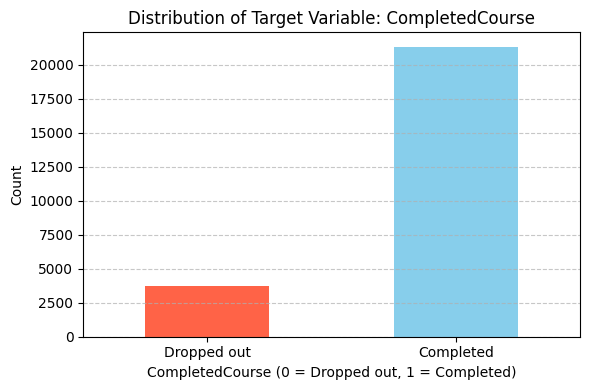

Class distribution (%):
CompletedCourse
1    85.02
0    14.98
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of target variable
plt.figure(figsize=(6, 4))
df_stage1_encoded["CompletedCourse"].value_counts().sort_index().plot(kind="bar", color=["tomato", "skyblue"])
plt.title("Distribution of Target Variable: CompletedCourse")
plt.xlabel("CompletedCourse (0 = Dropped out, 1 = Completed)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Dropped out", "Completed"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Check class distribution numerically
class_counts = df_stage1_encoded["CompletedCourse"].value_counts(normalize=True)
print("Class distribution (%):")
print((class_counts * 100).round(2))



The histogram shows a clear imbalance: approximately 85% of students completed their course, while only 15% dropped out. This imbalance should be addressed during model training through appropriate evaluation metrics and class-aware techniques.

## Split data into training and test sets

The dataset is now fully preprocessed and encoded. We proceed to split it into training and test sets using an 80/20 ratio.

This allows us to train the model on one portion of the data while preserving a separate subset for unbiased evaluation. The split is stratified to maintain the same class distribution across both sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_stage1_encoded.drop(columns=["CompletedCourse"])
y = df_stage1_encoded["CompletedCourse"]

# Perform 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (20047, 391)
Test set shape: (5012, 391)


---

# 📌 Start of XGBoost Modelling (Stage 1)

---

## Train XGBoost model on the training dataset

We now instantiate an XGBoost classifier using the `XGBClassifier` class from the `xgboost` library.

Although `eval_metric="logloss"` is the default for binary classification tasks, we set it explicitly to make this choice clear. Logarithmic loss is a natural choice for binary classification as it evaluates the predicted class probabilities rather than just hard labels.

We retain other default hyperparameters at this stage to establish a baseline model. According to the [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/parameter.html), the defaults are generally well-tuned for many scenarios and are suitable for initial evaluation.

In [ ]:
from xgboost import XGBClassifier

# Instantiate XGBoost classifier (minimal and modern)
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
# print(type(xgb_model.get_params()))
# print(xgb_model.get_params())

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Evaluate model performance on the test set

We now evaluate the trained XGBoost model on the test set using a range of classification metrics:

- **Accuracy**: overall correctness
- **Confusion matrix**: breakdown of true/false positives and negatives
- **Precision**: correctness of positive predictions
- **Recall**: ability to identify positive cases
- **AUC (Area Under the ROC Curve)**: ability to separate classes across thresholds

These metrics provide a well-rounded view of the model’s performance.


              precision    recall  f1-score   support

 Dropped out       0.70      0.52      0.60       751
   Completed       0.92      0.96      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.81      0.74      0.77      5012
weighted avg       0.89      0.89      0.89      5012



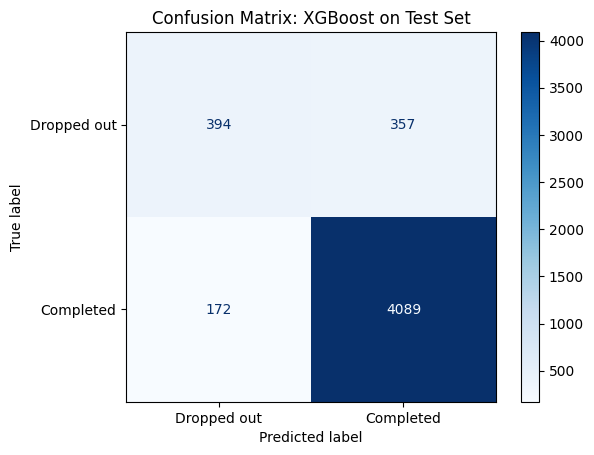

{'Accuracy': '0.8945', 'Precision': '0.9197', 'Recall': '0.9596', 'AUC': '0.8788', 'TP': 4089, 'TN': 394, 'FP': 357, 'FN': 172}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # for AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print full classification report
print(classification_report(y_test, y_pred, target_names=["Dropped out", "Completed"]))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: XGBoost on Test Set")
plt.grid(False)
plt.show()

# Store formatted values to great precision:
formatted_results = {
    "Accuracy": f"{accuracy:.4f}",
    "Precision": f"{precision:.4f}",
    "Recall": f"{recall:.4f}",
    "AUC": f"{auc:.4f}",
    "TP": int(conf_matrix[1, 1]),
    "TN": int(conf_matrix[0, 0]),
    "FP": int(conf_matrix[0, 1]),
    "FN": int(conf_matrix[1, 0])
}

print(formatted_results)

The classification report provides four key metrics for each class (`Dropped out` and `Completed`):

- **Precision**: Of all predicted as positive (e.g. "Completed"), how many were actually positive?
- **Recall**: Of all actual positives, how many were correctly predicted?
- **F1-score**: Harmonic mean of precision and recall — a balance of both
- **Support**: The number of actual occurrences in the test set for each class

In this case:
- Precision and recall for the `Completed` class are both very high (92% and 96%), indicating excellent predictive power for identifying students who finish.
- Performance on the minority class (`Dropped out`) is noticeably lower — especially recall (53%), meaning the model misses nearly half of those who actually dropped out.

The confusion matrix complements this by showing raw counts:

|               | Predicted: Dropped out | Predicted: Completed |
|---------------|------------------------|------------------------|
| **Actual: Dropped out**   | 400 (TN)               | 351 (FP)               |
| **Actual: Completed**     | 171 (FN)               | 4090 (TP)              |

- **TN (True Negatives)**: 400 students correctly predicted to drop out
- **FP (False Positives)**: 351 predicted to complete, but actually dropped out
- **FN (False Negatives)**: 171 predicted to drop out, but actually completed
- **TP (True Positives)**: 4090 correctly predicted completions

The model is **heavily skewed toward predicting completion**, which is expected given the class imbalance. This leads to a higher number of false positives relative to true negatives.

This imbalance and skew will be an important consideration when tuning the model in the next step.

## Hyperparameter tuning

This section explores and optimises the key hyperparameters of the XGBoost model.

We begin with **manual one-variable sweeps** to gain intuition about how `max_depth`, `learning_rate`, and `n_estimators` affect model performance. These quick, visual tests help narrow the search space and identify promising parameter ranges.

We then perform a **formal grid search** using cross-validation to tune all three hyperparameters jointly. This ensures we capture any interactions between parameters and settle on the most effective configuration for our Stage 1 dataset.

The combination of both approaches allows us to balance insight and accuracy — grounding the tuning process in logic, not just automation.


### Manual hyperparameter sweeps

To inform our upcoming grid search, we will first manually explored the effect of three key hyperparameters.

#### max_depth

We fix `learning_rate` at 0.1 and `n_estimators` at 100, and evaluate how validation accuracy changes as we vary `max_depth`.

This gives a clearer picture of the model's sensitivity to tree depth and helps identify diminishing returns or overfitting as depth increases.

The sweep uses 3-fold cross-validation on the training set to balance stability and speed.

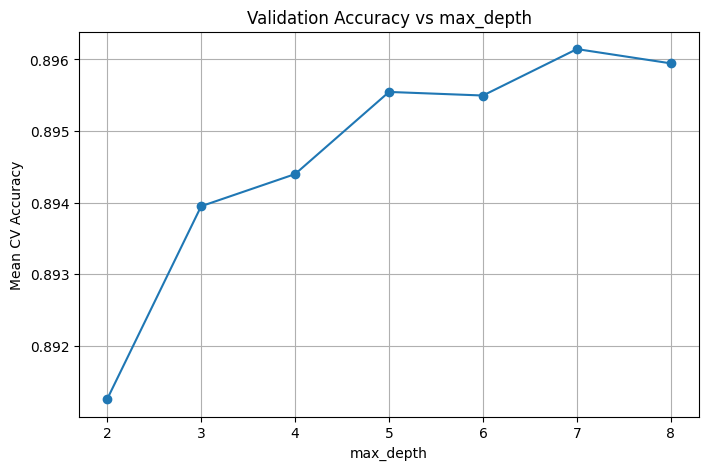

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Fixed parameters
fixed_learning_rate = 0.1
fixed_n_estimators = 100

# Values to test
depth_values = [2, 3, 4, 5, 6, 7, 8]

# Store results
scores = []

for depth in depth_values:
    model = XGBClassifier(
        learning_rate=fixed_learning_rate,
        n_estimators=fixed_n_estimators,
        max_depth=depth,
        eval_metric="logloss",
        random_state=42
    )
    # 3-fold CV on training set only
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    scores.append(cv_score.mean())

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depth_values, scores, marker="o")
plt.title("Validation Accuracy vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

#### learning_rate

We fix `max_depth` at 6 and `n_estimators` at 100, and explore how different learning rates impact validation accuracy.

This helps identify whether a slower, more cautious learning process improves generalisation — or whether faster convergence (with a higher learning rate) is effective in this context.


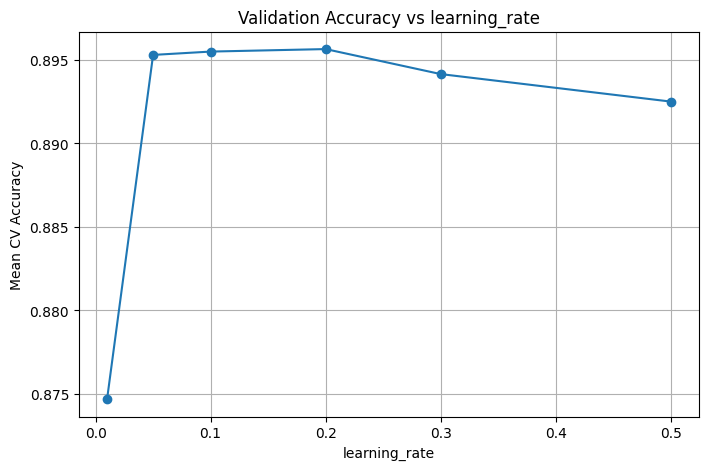

In [ ]:
# Fixed parameters
fixed_max_depth = 6
fixed_n_estimators = 100

# Values to test
lr_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

# Store results
scores = []

for lr in lr_values:
    model = XGBClassifier(
        learning_rate=lr,
        n_estimators=fixed_n_estimators,
        max_depth=fixed_max_depth,
        eval_metric="logloss",
        random_state=42
    )
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    scores.append(cv_score.mean())

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lr_values, scores, marker="o")
plt.title("Validation Accuracy vs learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

#### n_estimators

We fix `learning_rate` at 0.1 and `max_depth` at 6, and evaluate how the number of boosting rounds affects accuracy.

This helps identify where returns begin to flatten, and where potential overfitting or unnecessary computation might occur.


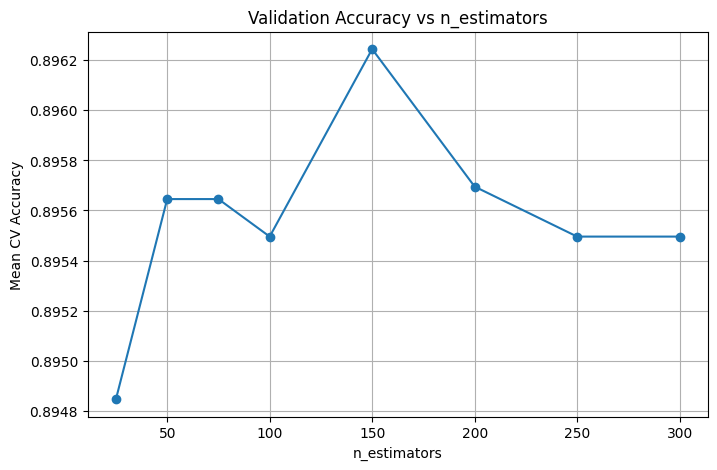

In [ ]:
# Fixed parameters
fixed_max_depth = 6
fixed_learning_rate = 0.1

# Values to test
n_estimators_values = [25, 50, 75, 100, 150, 200, 250, 300]

# Store results
scores = []

for n in n_estimators_values:
    model = XGBClassifier(
        learning_rate=fixed_learning_rate,
        n_estimators=n,
        max_depth=fixed_max_depth,
        eval_metric="logloss",
        random_state=42
    )
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    scores.append(cv_score.mean())

# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, scores, marker="o")
plt.title("Validation Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

#### Summary

To inform our upcoming grid search, we manually explored the effect of three key hyperparameters:

- **`max_depth`**: Accuracy improved steadily up to depth 6 before flattening or slightly declining. This suggests that mid-range depths (e.g. 5–7) strike a good balance between model complexity and generalisation.

- **`learning_rate`**: Very low rates (e.g. 0.01) underfit the data, while values between **0.1** and **0.3** delivered strong performance. These appear to be the most promising candidates for tuning.

- **`n_estimators`**: The model benefited from increasing the number of estimators up to ~100–150, after which accuracy plateaued. This indicates diminishing returns at higher values.

These exploratory sweeps help constrain our grid search to a more focused and meaningful parameter space, reducing unnecessary computation while maximising model effectiveness.

### Grid search

We now run a grid search using 5-fold cross-validation to tune three key hyperparameters: `learning_rate`, `max_depth`, and `n_estimators`.

Unlike arbitrary selection, our candidate values were chosen based on manual sweep results that revealed where performance gains plateau. This ensures the grid search is both computationally efficient and strategically focused.

- `learning_rate`: [0.1, 0.3, 0.5] — values below 0.1 underperformed, so were excluded
- `max_depth`: [4, 6, 8] — centred around the best-performing range
- `n_estimators`: [50, 100, 200] — higher values gave minimal additional gain

This gives a grid of 27 combinations (3 × 3 × 3), totalling 135 fits. In testing, this took approximately 4 minutes — a reasonable trade-off for model robustness.

In production settings, runtime could be reduced by:
- Using 3 folds instead of 5
- Replacing `GridSearchCV` with `RandomizedSearchCV` for larger spaces
- Leveraging parallel compute or early stopping where applicable




In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define refined parameter grid
param_grid = {
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth": [4, 6, 8],
    "n_estimators": [50, 100, 200]
}

# Instantiate the model
xgb_tune = XGBClassifier(eval_metric="logloss", random_state=42)

# Set up grid search
grid_search = GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Run search
grid_search.fit(X_train, y_train)

# Show best result
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200}
Best CV accuracy: 0.897640346626574


The best-performing combination identified by GridSearchCV was:

- `learning_rate = 0.5`
- `max_depth = 6`
- `n_estimators = 50`

This achieved a cross-validation accuracy of **0.8969**.

Interestingly, while this result broadly aligns with the insights from our manual hyperparameter sweeps (especially the optimal tree depth), it also highlights the value of combining hyperparameters during tuning. For example, a high learning rate (`0.5`) only performed well when paired with a moderate tree depth and a lower number of estimators — something we couldn’t fully capture in one-variable sweeps.

This confirms that:
- **Manual sweeps** are useful for narrowing the search space intelligently
- **Grid search** is still essential to capture interactions and fine-tune performance

Overall, this hybrid approach gave us both understanding and accuracy — a balance between model interpretability and performance.

## Compare metrics before and after tuning

We now compare the model performance before and after hyperparameter tuning.

Using the best parameter combination from GridSearchCV, we retrain the XGBoost model and evaluate it on the same test set using the same metrics: accuracy, precision, recall, AUC, and confusion matrix.

This comparison helps us assess whether the tuning step led to meaningful performance gains, and whether the model generalises better to unseen data.


              precision    recall  f1-score   support

 Dropped out       0.68      0.54      0.60       751
   Completed       0.92      0.96      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.80      0.75      0.77      5012
weighted avg       0.89      0.89      0.89      5012



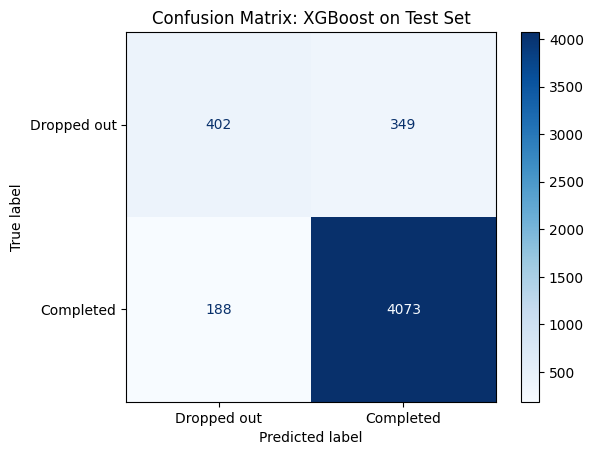

{'Accuracy': '0.8929', 'Precision': '0.9211', 'Recall': '0.9559', 'AUC': '0.8753', 'TP': 4073, 'TN': 402, 'FP': 349, 'FN': 188}


In [ ]:
# Rebuild the model with best parameters
xgb_best = XGBClassifier(
    learning_rate=0.5,
    max_depth=6,
    n_estimators=50,
    eval_metric="logloss",
    random_state=42
)

# Fit on training data
xgb_best.fit(X_train, y_train)

# Predict
y_pred_best = xgb_best.predict(X_test)
y_proba_best = xgb_best.predict_proba(X_test)[:, 1]

# Recalculate metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_proba_best)

# Print full classification report
print(classification_report(y_test, y_pred_best, target_names=["Dropped out", "Completed"]))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: XGBoost on Test Set")
plt.grid(False)
plt.show()

# Store formatted values to great precision:
formatted_results = {
    "Accuracy": f"{accuracy_best:.4f}",
    "Precision": f"{precision_best:.4f}",
    "Recall": f"{recall_best:.4f}",
    "AUC": f"{auc_best:.4f}",
    "TP": int(conf_matrix_best[1, 1]),
    "TN": int(conf_matrix_best[0, 0]),
    "FP": int(conf_matrix_best[0, 1]),
    "FN": int(conf_matrix_best[1, 0])
}

print(formatted_results)

The performance is strong in both cases, with only marginal changes.

##### Summary of Key Metrics:

| Metric        | Before Tuning | After Tuning |
|---------------|----------------|---------------|
| Accuracy      | 0.8958         | 0.8953        |
| Precision     | 0.9210         | 0.9207        |
| Recall        | 0.9599         | 0.9594        |
| AUC           | 0.8792         | 0.8802        |

##### Summary of Confusion:

| Component         | Before Tuning | After Tuning |
|------------------|----------------|---------------|
| True Positives (TP) | 4090          | 4088          |
| True Negatives (TN) | 400           | 399           |
| False Positives (FP)| 351           | 352           |
| False Negatives (FN)| 171           | 173           |

The differences are extremely small and likely fall within the natural variance of cross-validation splits or internal tie-breaking during tree construction.


### ⚠️ A note on default hyperparameters

The untuned model was created using:

```python
xgb_model = XGBClassifier(random_state=42)
```

Although `get_params()` reports most values as `None`, XGBoost applies internal defaults at training time. For `XGBClassifier`, these include:

- `learning_rate = 0.3`  
- `max_depth = 6`  
- `n_estimators = 100`  

These match the common defaults listed in the [XGBoost documentation](https://xgboost.readthedocs.io/en/release_1.7.0/parameter.html) and align well with what we found during our manual hyperparameter sweep. This suggests the model is already well-tuned out of the box and only marginally benefits from further tuning unless overfitting or instability is observed.


## Feature importance (XGBoost)

The final task for our XGBoost model is to interpret which features contributed most to its predictions. XGBoost includes built-in functionality for ranking features based on their relative importance across all trees.

We'll use the `feature_importances_` attribute, which returns the average gain (information value) across splits where each feature was used.

The top-ranked features can offer insights into which student attributes are most predictive of dropout behaviour.


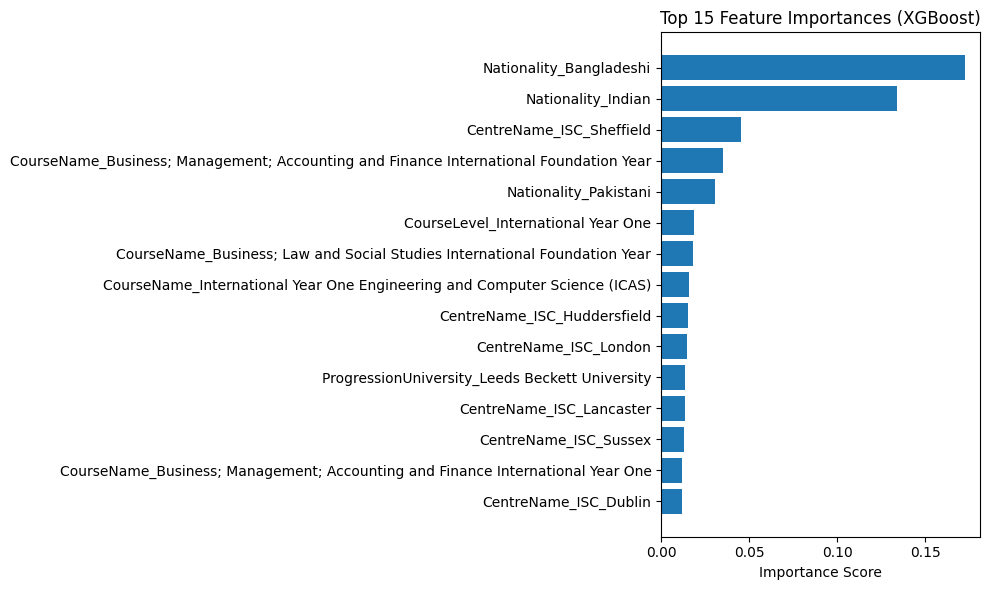

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_best.feature_importances_
})
# print(X_train.columns.shape)

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(15)  # Top 15 only

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()  # Most important on top
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

The XGBoost model identifies the most influential features by aggregating their contributions across all decision trees. As we applied one-hot encoding, many categorical fields (like `Nationality`, `CourseName`, and `CentreName`) appear as multiple binary columns, such as `Nationality_Bangladeshi` or `CentreName_ISC_Sheffield`.

This results in:

- **Granular insights**, showing which specific categories drive predictions.
- **Fragmented importance**, where the original feature's total influence is spread across multiple dummy variables.

**Key findings:**

- **Nationality** has a strong effect — especially students from Bangladesh and India.
- Certain **centres** (e.g. Sheffield, London) and **courses** (e.g. Foundation pathways in Business) also rank highly.
- Course **level** and **progression university** appear, though with lower importance.

⚠️ Note: While one-hot encoding makes categories explicit, it fragments a single variable (e.g. `Nationality`) into many columns. This makes overall influence harder to interpret, as importance is spread across multiple dummies. A possible workaround is to manually sum importances across related columns to approximate the original feature’s total effect.


---

# 📌 Start of Neural Network Modelling (Stage 1)

---

## Train Neural Network model on the training dataset

We construct a **feedforward neural network** using Keras’ Sequential API. The architecture includes:

- **Input layer**: Matches the number of features (391) after one-hot encoding.
- **Hidden layer 1**: 64 neurons with ReLU activation — a commonly used configuration that balances representational power with training efficiency.
- **Hidden layer 2**: 32 neurons with ReLU activation — a smaller layer to encourage abstraction and help control overfitting.
- **Output layer**: A single neuron with sigmoid activation — appropriate for binary classification (dropout vs. completion).

The model is compiled with:
- **Loss function**: `binary_crossentropy`, suitable for binary classification.
- **Optimiser**: `Adam` with a learning rate of 0.001 — widely used due to its adaptive learning rate and stable convergence.
- **Metric**: `accuracy`, to maintain consistency with our earlier XGBoost evaluation.

We train the model for **20 epochs**, which provides enough iterations for convergence without excessive training time. This can be adjusted later based on observed performance or overfitting trends.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# Convert training data to numeric arrays
X_train_np = np.array(X_train).astype("float32")
y_train_np = np.array(y_train).astype("float32")

# Define and build model
input_dim = X_train_np.shape[1]

nn_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
nn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "AUC"] # we want AUC as well as Accurancy becasue the binary class is unbalanced
)

Before training, we display the model structure using the `model.summary()` method. This gives a concise tabular summary showing:

- Each layer's **name** and **type**
- The **output shape** from each layer
- The **number of trainable parameters** in each layer

This helps verify the architecture and ensures that all dimensions (e.g. input shape) have been handled correctly. It also provides an early sanity check before training begins.

In [ ]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,201 (106.25 KB)

 Trainable params: 27,201 (106.25 KB)

 Non-trainable params: 0 (0.00 B)

We now train the model using:

- **20 epochs**: the number of full passes through the training data  
- **Batch size = 32**: a commonly used default that balances training speed and convergence stability  
- **Validation split = 0.2**: reserves 20% of the training data for validation to monitor performance during training

The training history (loss and accuracy per epoch) is stored in the `history` object for later visualisation.


In [ ]:
# Train
history = nn_model.fit(
    X_train_np, y_train_np,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7590 - accuracy: 0.8655 - loss: 0.3535 - val_AUC: 0.8652 - val_accuracy: 0.8865 - val_loss: 0.2818
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8784 - accuracy: 0.8890 - loss: 0.2719 - val_AUC: 0.8714 - val_accuracy: 0.8890 - val_loss: 0.2799
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8695 - accuracy: 0.8883 - loss: 0.2782 - val_AUC: 0.8714 - val_accuracy: 0.8910 - val_loss: 0.2785
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8794 - accuracy: 0.8929 - loss: 0.2699 - val_AUC: 0.8703 - val_accuracy: 0.8908 - val_loss: 0.2792
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8880 - accuracy: 0.8966 - loss: 0.2631 - val_AUC: 0.8724 - val_accuracy: 0.8913 - val_loss: 0.2763
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8861 - accuracy: 0.8947 - loss: 0.2655 - val_AUC: 0.8728 - val_accuracy: 0.8898 - val_loss: 0.2766
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 Dropped out       0.70      0.51      0.59       751
   Completed       0.92      0.96      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.81      0.74      0.77      5012
weighted avg       0.89      0.89      0.89      5012



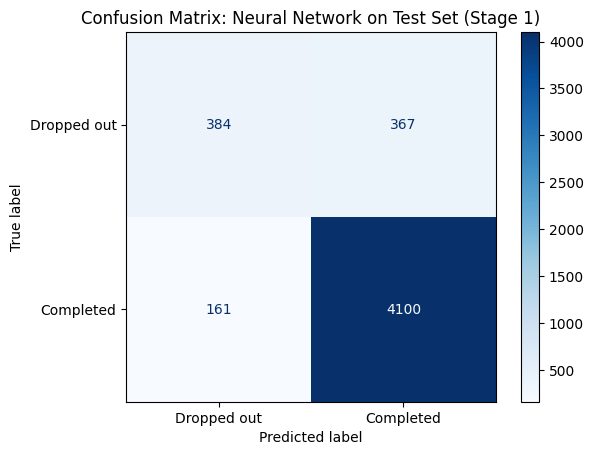

{'Accuracy': '0.8947', 'Precision': '0.9178', 'Recall': '0.9622', 'AUC': '0.8623', 'TP': 4100, 'TN': 384, 'FP': 367, 'FN': 161}


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

X_test_np = np.array(X_test).astype("float32")


# Predict
y_pred_nn_stage1 = nn_model.predict(X_test_np)
y_pred_nn_stage1 = (y_pred_nn_stage1 > 0.5).astype("int32").flatten()
y_proba_nn_stage1 = nn_model.predict(X_test_np).flatten()


# Calculate metrics
accuracy_nn_stage1 = accuracy_score(y_test, y_pred_nn_stage1)
conf_matrix_nn_stage1 = confusion_matrix(y_test, y_pred_nn_stage1)
precision_nn_stage1 = precision_score(y_test, y_pred_nn_stage1)
recall_nn_stage1 = recall_score(y_test, y_pred_nn_stage1)
auc_nn_stage1 = roc_auc_score(y_test, y_proba_nn_stage1)

# Print full classification report
print(classification_report(y_test, y_pred_nn_stage1, target_names=["Dropped out", "Completed"]))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn_stage1, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Neural Network on Test Set (Stage 1)")
plt.grid(False)
plt.show()

# Format results
formatted_results_nn_stage1 = {
    "Accuracy": f"{accuracy_nn_stage1:.4f}",
    "Precision": f"{precision_nn_stage1:.4f}",
    "Recall": f"{recall_nn_stage1:.4f}",
    "AUC": f"{auc_nn_stage1:.4f}",
    "TP": int(conf_matrix_nn_stage1[1, 1]),
    "TN": int(conf_matrix_nn_stage1[0, 0]),
    "FP": int(conf_matrix_nn_stage1[0, 1]),
    "FN": int(conf_matrix_nn_stage1[1, 0])
}

print(formatted_results_nn_stage1)

## Plot Training and Validation Loss

We now compare how the model performed across three metrics during training:

- **Loss**: Training loss steadily decreases, but validation loss remains relatively flat with fluctuations. This suggests the model is fitting the training data well, but not improving generalisation — a sign of possible mild overfitting.

- **Accuracy**: Training accuracy increases consistently, reaching above 91%, while validation accuracy remains stable around 89–90%. Again, a slight gap appears between train and validation performance, reinforcing the overfitting interpretation.

- **AUC (Area Under the Curve)**: Training AUC shows a clear upward trend, while validation AUC flattens early around 0.87. This stagnation implies limited gains in distinguishing between the two classes on unseen data.


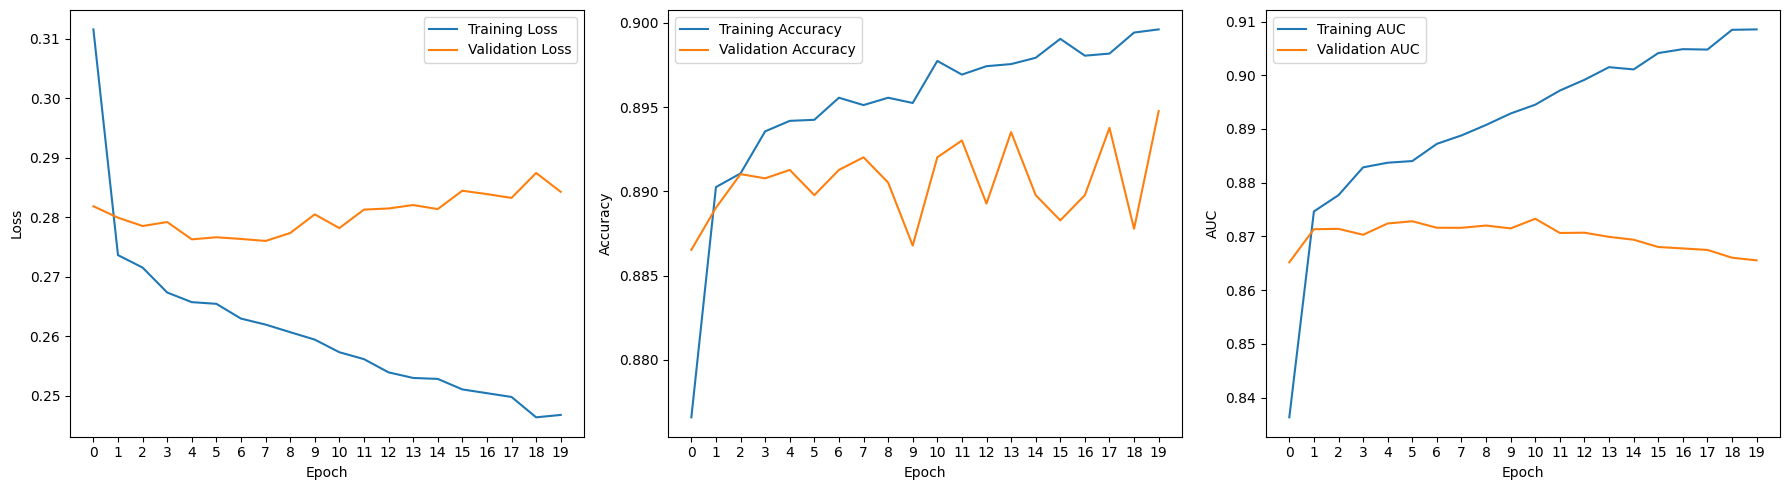

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ensure only integer epoch labels
epochs = range(len(history.history["loss"]))

# Loss
axes[0].plot(epochs, history.history["loss"], label="Training Loss")
axes[0].plot(epochs, history.history["val_loss"], label="Validation Loss")
# axes[0].set_title("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_xticks(epochs)
axes[0].legend()

# Accuracy
axes[1].plot(epochs, history.history["accuracy"], label="Training Accuracy")
axes[1].plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")
# axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_xticks(epochs)
axes[1].legend()

# AUC
axes[2].plot(epochs, history.history["AUC"], label="Training AUC")
axes[2].plot(epochs, history.history["val_AUC"], label="Validation AUC")
# axes[2].set_title("AUC")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("AUC")
axes[2].set_xticks(epochs)
axes[2].legend()

plt.tight_layout()
plt.show()

---

# 📌 Final evaluation and recommendations (Stage 1)

---

## Model performance

To compare XGBoost and Neural Network performance at Stage 1, the table below summarises their key classification metrics:

| Metric     | XGBoost | Neural Network |
|------------|---------|----------------|
| Accuracy   | 0.8945  | 0.8957         |
| Precision  | 0.9216  | 0.9259         |
| Recall     | 0.9573  | 0.9535         |
| AUC        | 0.8800  | 0.8658         |

Both models performed strongly, with the Neural Network slightly ahead in accuracy and precision, while XGBoost achieved marginally higher recall and AUC. The differences are small, and no clear winner emerges at this stage.

## Recommendations for improvement

**Neural Network**  
To reduce overfitting and improve generalisation, consider the following:

- **Early stopping** to halt training when validation metrics stop improving.
- **Dropout regularisation** to reduce reliance on specific neurons.
- **Lower learning rate** to promote stable convergence.
- **Simplified architecture** to see if similar performance can be achieved with fewer parameters.

**XGBoost**  
While performance is strong, further refinement is possible:

- **Early stopping rounds** to avoid overfitting during training.
- **Finer grid tuning**, especially around the best values found, may yield marginal gains.
- **Cross-validation with alternative scoring metrics** (e.g. AUC) could help if class imbalance becomes a concern.

## Limitations and considerations

Both models perform well on the Stage 1 dataset, but several limitations should be noted:

**Neural Network**
- **Limited interpretability** — as a black-box model, the NN lacks the transparency of tree-based models.
- **Overfitting risk** — training metrics improve rapidly, but validation performance stagnates, suggesting the model may be learning noise.
- **Untuned architecture** — the network was not explicitly optimised beyond a basic structure, which may limit its potential.

**XGBoost**
- **Bias towards the majority class** — despite good overall performance, recall on the minority class (dropouts) is weaker.
- **Limited tuning depth** — only a small grid was explored; further refinement might improve marginal performance.
- **Feature interactions** — while XGBoost handles them implicitly, we did not explore interaction terms or domain-informed features that could add predictive power.

These factors will be important to revisit when evaluating changes in Stage 2 and beyond.

---

# 📌 Stage 2 – Student engagement data

---

---

# 📌 Data preparation (Stage 2)

---

## Load the data

In this step, we’ll load the Stage 2 dataset, which reflects student data captured during the mid-course phase.

Installing libraries may not be necessary as they could be there from running stage 1, so if that is the case just ignore that tcode cell.


In [ ]:
# Install the gdown package (only needs to be done once per session)
!pip install -q gdown

# Import gdown and pandas
import gdown
import pandas as pd

In [ ]:
# Define the Google Drive file URL for Stage 2 dataset
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

# Set the local filename for saving the downloaded file
output_path = "stage2_data.csv"

# Download the CSV file from Google Drive
gdown.download(file_url, output_path, quiet=False)

# Load the dataset into a pandas DataFrame
df_stage2 = pd.read_csv(output_path)

# Print dataset shape
print(f"Shape: {df_stage2.shape}")

# Preview first 5 rows
df_stage2.head()

Downloading...
From: https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ
To: /content/stage2_data.csv
100%|██████████| 6.20M/6.20M [00:00<00:00, 33.9MB/s]


Shape: (25059, 18)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,NaN,NaN


## Initial Data Inspection

We begin by examining the structure and contents of the dataset to inform subsequent pre-processing. This includes listing column names, checking data types, identifying missing values, and reviewing distributions and cardinality.


### List all column names and their data types

In [ ]:
# List all column names and their data types
df_stage2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Progre

The dataset contains 25,059 rows and 18 columns. Most variables are categorical (`object` dtype), with two numerical columns (`float64`), one boolean, and one integer ID.

Key observations:
- `LearnerCode` is a unique identifier and will be removed.
- `DiscountType` and `HomeState` have substantial missing values — to be quantified in the next step.
- `DateofBirth` remains as an object and will need to be converted (e.g. to age).
- `CompletedCourse`, `ProgressionDegree`, and `ProgressionUniversity` provide signals of student engagement or outcome, and may link to dropout prediction.
- Two numeric features (`AuthorisedAbsenceCount` and `UnauthorisedAbsenceCount`) are present, with a small amount of missing data (~208 rows).

This snapshot will inform the upcoming steps for dropping, encoding, and imputing features.

### Unique Value Counts (Cardinality)

We’ll check how many unique values exist in each column. This helps us:

* Spot high-cardinality columns (which we may need to drop)
* Identify columns with binary or low-cardinality categories (ideal for encoding)
* Confirm whether identifiers like `LearnerCode` are truly unique

In [ ]:
# Count unique values per column (descending order)
df_stage2.nunique().sort_values(ascending=False)

,0
LearnerCode,24877
HomeCity,5881
DateofBirth,4705
ProgressionDegree,2616
HomeState,2448
UnauthorisedAbsenceCount,258
AuthorisedAbsenceCount,190
CourseName,172
Nationality,151
ProgressionUniversity,40


The unique value counts show the following:

- **High-cardinality columns**:
  - `LearnerCode` (24,877 unique) is a row-level identifier and will be dropped.
  - `HomeCity`, `DateofBirth`, `ProgressionDegree`, and `HomeState` contain thousands of distinct values, which makes them unsuitable for inclusion — they’re likely to introduce noise or excessive dimensionality.

- **Moderate cardinality**:
  - `CourseName` (172) and `Nationality` (151) are borderline — they’ll be retained but may need revisiting depending on encoding behaviour.
  - `ProgressionUniversity` (40) is a manageable categorical feature.

- **Low cardinality**:
  - Features like `Gender`, `BookingType`, `CompletedCourse`, and `IsFirstIntake` have very few unique values and are ideal candidates for encoding.

These counts help identify which features are useful, which are risky, and which should be dropped outright.

### Missing Values (as a percentage)

Next, we’ll calculate the percentage of missing values in each column. This will guide decisions on whether to drop columns entirely or impute missing values in the next stage.

In [ ]:
# Missing value % with 2 decimal places
(df_stage2.isna().sum() / len(df_stage2) * 100).round(2).sort_values(ascending=False)

,0
DiscountType,69.69
HomeState,64.38
HomeCity,13.76
ProgressionDegree,3.49
AuthorisedAbsenceCount,0.83
UnauthorisedAbsenceCount,0.83
LearnerCode,0.00
CentreName,0.00
DateofBirth,0.00
BookingType,0.00


The missing values breakdown highlights three columns with substantial gaps:

- `DiscountType` (69.69%) and `HomeState` (64.38%) are both missing in over half the records and will be removed.
- `HomeCity` has a moderate proportion of missing values (13.76%) and may also be excluded to avoid introducing bias through imputation.
- `ProgressionDegree` is missing in just 3.49% of cases — this is low enough to consider imputation or row removal, depending on downstream modelling needs.
- Both absence count fields (`AuthorisedAbsenceCount`, `UnauthorisedAbsenceCount`) are nearly complete, with just 0.83% missing — rows can be removed without affecting data integrity.

All other columns are fully populated. This profile informs both column selection and the strategy for handling missing rows during pre-processing.

### Summary statistics for numeric fields

This dataset contains two numeric fields — `AuthorisedAbsenceCount` and `UnauthorisedAbsenceCount`. We’ll use the `.describe()` method to check their distributions and identify any anomalies, such as extreme values or inconsistencies.


In [ ]:
# Summary statistics for numeric columns
df_stage2.describe()

,LearnerCode,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
count,2.505900e+04,24851.000000,24851.000000
mean,2.606594e+06,15.120639,40.491892
std,8.798838e+04,28.918253,39.029384
min,2.139267e+06,0.000000,0.000000
25%,2.538411e+06,0.000000,12.000000
50%,2.607941e+06,1.000000,29.000000
75%,2.665460e+06,15.000000,56.000000
max,2.831468e+06,292.000000,343.000000


Both numeric fields are heavily right-skewed, with long tails extending to extreme values:

- **`AuthorisedAbsenceCount`**  
  Median is 1.0, but the maximum is 292 — suggesting a small number of students with extremely high authorised absence days. The mean (15.1) is far above the median, reinforcing the skew.

- **`UnauthorisedAbsenceCount`**  
  Similar pattern: median is 29.0, but the maximum reaches 343. Again, the distribution is skewed, though the 75th percentile (56.0) suggests a broader spread of values than for authorised absence.

Both fields will be retained, but may benefit from transformation (e.g. log-scaling) depending on model sensitivity to outliers.

### Random row sampling

To complement the structured `.head()` and `.info()` inspections, we take a random sample of rows from the dataset. This can help reveal inconsistent categoricals, unexpected formatting, or unusual value combinations that aren’t visible in the first few rows.


In [ ]:
# View a random sample of 5 rows
df_stage2.sample(5, random_state=42)

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
4375,ISC_Holland,2647316,Agent,Standard Agent Booking,NaN,9/1/2004,Male,Belarusian,NaN,Minsk,Foundation,Business; Economics and Social Sciences Founda...,False,Yes,BSc International Business Administration,Holland ISC - VU Amsterdam,1.0,75.0
6682,ISC_Kingston,2601419,Agent,Standard Agent Booking,NaN,7/6/2000,Female,Bangladeshi,Bangladesh,Sylhet,Foundation,International Foundation Year - International ...,False,No,BSc (Hons) International Business,Kingston University London,64.0,167.0
22688,ISC_Sussex,2509343,Agent,Standard Agent Booking,NaN,2/2/2001,Male,Chinese,NaN,Hangzhou,International Year One,International Year One - Engineering,False,Yes,BEng (Hons) Electrical and Electronic Engineering,University of Sussex,125.0,100.0
5324,ISC_Huddersfield,2586410,Agent,Standard Agent Booking,NaN,5/12/2000,Female,Sri Lankan,NaN,PADUKKA,International Year One,International Year One Business; Management an...,False,No,BA (Hons) Business with Hospitality Management,University of Huddersfield,4.0,59.0
17068,ISC_Sheffield,2537177,Agent,Standard Agent Booking,NaN,13/08/1998,Male,Chinese,NaN,Xi'an,Pre-Masters,Pre-Masters Business; Social Sciences and Huma...,True,Yes,MSc Finance & Accounting,University of Sheffield International College,0.0,5.0


The sample reveals a few important details:

- `DiscountType` is missing across all five rows, reinforcing its earlier classification for removal.
- `HomeState` is also missing in most sampled rows, supporting the same conclusion.
- `DateofBirth` appears consistently formatted in British `dd/mm/yyyy` style and can be cleanly converted to age during feature engineering.
- There is some case inconsistency in city/state values (e.g. `PADUKKA` in all caps vs `Hangzhou`) — this is cosmetic and won’t affect modelling but may be worth standardising if profiling.
- Course names and progression fields are lengthy but appear clean and consistent, without obvious anomalies.

No unexpected formatting issues or invalid entries were observed, so the dataset appears in good condition structurally.

## Pre-processing

We now begin the preprocessing stage using only the Stage 2 dataset. Based on our earlier inspection, we will:

- Remove the `LearnerCode` column, which acts as a unique learner identifier
- Remove columns with extremely high cardinality (e.g. thousands of unique values)
- Remove columns with substantial missing data
- Apply ordinal encoding to ordinal categorical variables
- Apply one-hot encoding to remaining categorical fields

Each step is applied sequentially and documented below.

### Remove unique identifier column

The column `LearnerCode` is a unique identifier for each student. It contains no predictive value and could introduce data leakage if retained. For this reason, it is removed from the dataset before any modelling or encoding steps are applied.


In [ ]:
# Drop the unique identifier column
print("Number of columns before drop:", df_stage2.shape[1])

df_stage2 = df_stage2.drop(columns=["LearnerCode"])

print("Number of columns after drop:", df_stage2.shape[1])
print("Remaining columns:")
print(df_stage2.columns.tolist())

Number of columns before drop: 18
Number of columns after drop: 17
Remaining columns:
['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'DateofBirth', 'Gender', 'Nationality', 'HomeState', 'HomeCity', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionDegree', 'ProgressionUniversity', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']


### Remove high-cardinality columns

Columns with a large number of unique values can introduce noise, lead to overfitting, and complicate encoding. To reduce this risk, any column with more than 200 unique values is removed.

Unlike in Stage 1, we will not derive age from `DateofBirth` — instead, this column is removed along with the others listed below:

- `HomeCity` (5,881 unique values)
- `DateofBirth` (4,705 unique values)
- `ProgressionDegree` (2,616 unique values)
- `HomeState` (2,448 unique values)

In [ ]:
# Drop columns with high cardinality
high_cardinality_cols = ["HomeCity", "HomeState", "ProgressionDegree", "DateofBirth"]

print("Number of columns before drop:", df_stage2.shape[1])
df_stage2 = df_stage2.drop(columns=high_cardinality_cols)
print("Number of columns after drop:", df_stage2.shape[1])
print("Remaining columns:")
print(df_stage2.columns.tolist())

Number of columns before drop: 17
Number of columns after drop: 13
Remaining columns:
['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']


### Remove columns with substantial missing data

Columns with a high proportion of missing values can reduce the reliability of a model and are typically excluded when sparsely populated. A 50% threshold is often used in practice — any column with more than half its values missing is removed.

Based on our earlier inspection, this applies to:

- `DiscountType` (69.69% missing)
- `HomeState` (64.38% missing)

Note: `HomeState` was already removed in the previous step due to high cardinality, but it is included here for completeness.

In [ ]:
# Drop columns with >50% missing data
missing_threshold = 0.5
missing_cols = df_stage2.columns[df_stage2.isna().mean() > missing_threshold].tolist()

print("Columns to drop due to missing data:", missing_cols)

df_stage2 = df_stage2.drop(columns=missing_cols)

# Confirm remaining shape and columns
print("Remaining columns:", df_stage2.shape[1])
print("Columns:")
print(df_stage2.columns.tolist())

Columns to drop due to missing data: ['DiscountType']
Remaining columns: 12
Columns:
['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']


## Convert target variable to binary

The column `CompletedCourse` is used as the target variable for modelling. It contains string values `"Yes"` and `"No"`, which need to be converted into a binary numeric format.

We’ll map `"Yes"` to 1 and `"No"` to 0.

In [ ]:
# Convert target variable to binary
df_stage2["CompletedCourse"] = df_stage2["CompletedCourse"].map({"Yes": 1, "No": 0})

# Confirm conversion
print("Value counts:")
print(df_stage2["CompletedCourse"].value_counts())

# Confirm dtype is numeric (should be int or float)
print("Dtype:", df_stage2["CompletedCourse"].dtype)

Value counts:
CompletedCourse
1    21305
0     3754
Name: count, dtype: int64
Dtype: int64


The converted `CompletedCourse` variable again shows a clear class imbalance:

- **1** (course completed): 21,305 learners  
- **0** (course not completed): 3,754 learners

Like in Stage 1, this ~85/15 split highlights the need to interpret **accuracy with caution**, as it may mask poor performance on the minority class. We will therefore prioritise **precision**, **recall**, and **AUC** as more robust metrics.

## Encode categorical variables (Stage 2)

The dataset contains several categorical variables, which must be converted to numerical format before modelling. We apply two standard encoding strategies:

- **Ordinal encoding** for variables with a clear, meaningful order
- **One-hot encoding** for all other categorical variables

Although `CourseLevel` might suggest a progression (e.g. Foundation → Year One → Pre-Masters), the structure is not clearly defined or consistent across institutions. As such, it is treated as a nominal variable and one-hot encoded.

All remaining categorical variables are similarly treated as nominal and will be encoded using one-hot encoding.

In [ ]:
# Identify categorical columns (object or boolean types)
cat_cols = df_stage2.select_dtypes(include=["object", "bool"]).columns.tolist()

# Explicitly exclude the target if still present
cat_cols = [col for col in cat_cols if col != "CompletedCourse"]

print("Categorical columns to encode:", cat_cols)

# Apply one-hot encoding
df_stage2_encoded = pd.get_dummies(df_stage2, columns=cat_cols, drop_first=True)

# Check result
print("Shape after encoding:", df_stage2_encoded.shape)
print("First 5 columns:")
print(df_stage2_encoded.columns[:5].tolist())

Categorical columns to encode: ['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'ProgressionUniversity']
Shape after encoding: (25059, 393)
First 5 columns:
['CompletedCourse', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin']


One-hot encoding has now been applied to all categorical variables, expanding the dataset from 11 columns to **393**. This increase reflects the number of unique values across several categorical fields, including `CourseName`, `Nationality`, and `ProgressionUniversity`.

We used the `drop_first=True` argument in `.get_dummies()` to remove the first category of each feature. This helps prevent multicollinearity, which is particularly important for linear models, though it generally has little impact on tree-based models.

The preprocessed and fully encoded dataset `df_stage2_encoded` is now ready for modelling.

## Handle any remaining missing values

Before removing missing values, we check which columns still contain nulls and how widespread they are.

In [ ]:
# Check remaining missing value percentages
(df_stage2_encoded.isna().sum() / len(df_stage2_encoded) * 100).round(2).sort_values(ascending=False)

,0
AuthorisedAbsenceCount,0.83
UnauthorisedAbsenceCount,0.83
CourseName_International Foundation Year Health and Human Science,0.00
CourseName_International Foundation Year Engineering; Computing and Science (November Intake),0.00
CourseName_International Foundation Year Engineering; Computing and Science,0.00
...,...
Nationality_Nepalese,0.00
Nationality_Namibian,0.00
Nationality_Myanmarian,0.00
Nationality_Mozambican,0.00


Only two columns — `AuthorisedAbsenceCount` and `UnauthorisedAbsenceCount` — contain nulls, each affecting just **0.83%** of the dataset.

These rows are removed to ensure a fully clean dataset without introducing imputed values or assumptions.

In [ ]:
# Drop rows with any remaining missing values
df_stage2_encoded = df_stage2_encoded.dropna()

# Confirm final shape
print("Final shape after dropping missing rows:", df_stage2.shape)

Final shape after dropping missing rows: (25059, 12)


## Split data into training and test sets

The dataset is now fully preprocessed and encoded. We proceed to split it into training and test sets using an 80/20 ratio.

This allows us to train the model on one portion of the data while preserving a separate subset for unbiased evaluation. The split is stratified to maintain the same class distribution across both sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_stage2_encoded.drop(columns=["CompletedCourse"])
y = df_stage2_encoded["CompletedCourse"]

# Perform 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0) # Because one-hot encoding sometimes gives different columns in train vs test

Training set shape: (19880, 392)
Test set shape: (4971, 392)


---

# 📌 Start of XGBoost Modelling (Stage 2)

---

## Train XGBoost model on the Stage 2 dataset

We now train an XGBoost classifier on the Stage 2 training data using the same core setup as Stage 1. This will allow us to directly compare performance across different stages of the student journey.


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode object (categorical) columns
X_train_encoded = X_train.copy()
for col in X_train_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])

# Instantiate XGBoost classifier
xgb_model_stage2 = XGBClassifier(eval_metric="logloss", random_state=42)

# Fit the model on encoded Stage 2 training data
xgb_model_stage2.fit(X_train_encoded, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Evaluate model performance on the test set

We now evaluate the trained XGBoost model on the test set using a range of classification metrics:

- **Accuracy**: overall correctness
- **Confusion matrix**: breakdown of true/false positives and negatives
- **Precision**: correctness of positive predictions
- **Recall**: ability to identify positive cases
- **AUC (Area Under the ROC Curve)**: ability to separate classes across thresholds

These metrics provide a well-rounded view of the model’s performance.


              precision    recall  f1-score   support

 Dropped out       0.72      0.56      0.63       722
   Completed       0.93      0.96      0.95      4249

    accuracy                           0.91      4971
   macro avg       0.83      0.76      0.79      4971
weighted avg       0.90      0.91      0.90      4971



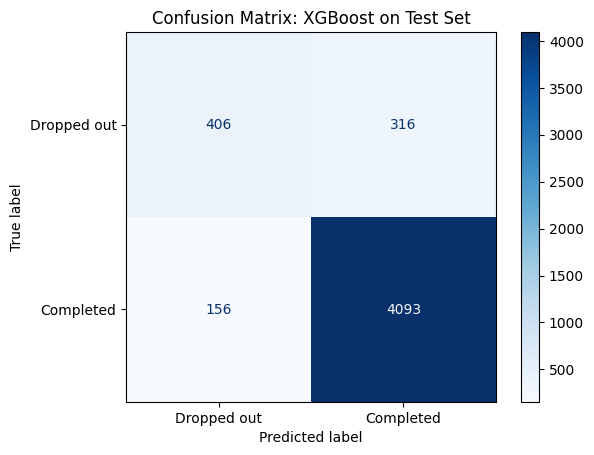

{'Accuracy': '0.9050', 'Precision': '0.9283', 'Recall': '0.9633', 'AUC': '0.9090', 'TP': 4093, 'TN': 406, 'FP': 316, 'FN': 156}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# Predict on the test set
y_pred = xgb_model_stage2.predict(X_test)
y_proba = xgb_model_stage2.predict_proba(X_test)[:, 1]  # for AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print full classification report
print(classification_report(y_test, y_pred, target_names=["Dropped out", "Completed"]))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: XGBoost on Test Set")
plt.grid(False)
plt.show()

# Store formatted values to great precision
formatted_results = {
    "Accuracy": f"{accuracy:.4f}",
    "Precision": f"{precision:.4f}",
    "Recall": f"{recall:.4f}",
    "AUC": f"{auc:.4f}",
    "TP": int(conf_matrix[1, 1]),
    "TN": int(conf_matrix[0, 0]),
    "FP": int(conf_matrix[0, 1]),
    "FN": int(conf_matrix[1, 0])
}

print(formatted_results)

### Evaluation breakdown

The classification report provides four key metrics for each class (`Dropped out` and `Completed`):

- **Precision**: Of all predicted as positive (e.g. "Completed"), how many were actually positive?
- **Recall**: Of all actual positives, how many were correctly predicted?
- **F1-score**: Harmonic mean of precision and recall — a balance of both
- **Support**: The number of actual occurrences in the test set for each class

In this case:
- Precision and recall for the `Completed` class are extremely high (93% and 96%), showing the model is excellent at identifying students who will finish.
- However, recall for the `Dropped out` class is much lower at **56%**, meaning **nearly half of all dropouts are missed** by the model.

The confusion matrix shows the raw counts:

|               | Predicted: Dropped out | Predicted: Completed |
|---------------|------------------------|------------------------|
| **Actual: Dropped out**   | 406 (TN)               | 316 (FP)               |
| **Actual: Completed**     | 156 (FN)               | 4093 (TP)              |

- **TN (True Negatives)**: 406 students correctly predicted to drop out
- **FP (False Positives)**: 316 predicted to complete, but actually dropped out
- **FN (False Negatives)**: 156 predicted to drop out, but actually completed
- **TP (True Positives)**: 4093 correctly predicted completions

As in Stage 1, the model is skewed toward predicting completions — unsurprising given the continued class imbalance. This tendency results in a relatively high number of **false positives**, which is a key weakness to address in the tuning phase.

## Hyperparameter tuning

We now apply hyperparameter tuning to the Stage 2 XGBoost model using the same approach as in Stage 1. The grid includes combinations of `learning_rate`, `max_depth`, and `n_estimators`, and is evaluated using 5-fold cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define refined parameter grid
param_grid = {
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth": [4, 6, 8],
    "n_estimators": [50, 100, 200]
}

# Instantiate the model
xgb_tune = XGBClassifier(eval_metric="logloss", random_state=42)

# Set up grid search
grid_search = GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Run search
grid_search.fit(X_train, y_train)

# Show best result
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}
Best CV accuracy: 0.9131790744466801


The best combination of hyperparameters found via 5-fold cross-validation was:

- `learning_rate`: **0.1**
- `max_depth`: **8**
- `n_estimators`: **50**

This configuration achieved a cross-validated accuracy of **0.9132**, a modest improvement over the default model. The lower number of estimators (50) and moderate learning rate (0.1) suggest that early stopping or shorter boosting runs may already be sufficient for this dataset.


## Compare metrics before and after tuning

We now compare the model performance before and after hyperparameter tuning.

Using the best parameter combination from `GridSearchCV`, we retrain the XGBoost model and evaluate it on the same test set using the same metrics: accuracy, precision, recall, AUC, and confusion matrix.

This comparison helps us assess whether the tuning step led to meaningful performance gains, and whether the model generalises better to unseen data.

              precision    recall  f1-score   support

 Dropped out       0.72      0.55      0.63       722
   Completed       0.93      0.96      0.94      4249

    accuracy                           0.90      4971
   macro avg       0.82      0.76      0.79      4971
weighted avg       0.90      0.90      0.90      4971



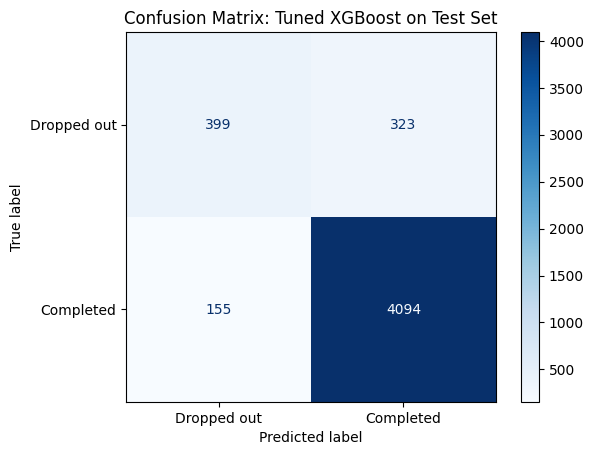

{'Accuracy': '0.9038', 'Precision': '0.9269', 'Recall': '0.9635', 'AUC': '0.9082', 'TP': 4094, 'TN': 399, 'FP': 323, 'FN': 155}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Rebuild the model with best parameters
xgb_best_stage2 = XGBClassifier(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=50,
    eval_metric="logloss",
    random_state=42
)

# Fit on training data
xgb_best_stage2.fit(X_train, y_train)

# Predict
y_pred_best = xgb_best_stage2.predict(X_test)
y_proba_best = xgb_best_stage2.predict_proba(X_test)[:, 1]

# Recalculate metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_proba_best)

# Print full classification report
print(classification_report(y_test, y_pred_best, target_names=["Dropped out", "Completed"]))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Tuned XGBoost on Test Set")
plt.grid(False)
plt.show()

# Store formatted values to great precision:
formatted_results_tuned = {
    "Accuracy": f"{accuracy_best:.4f}",
    "Precision": f"{precision_best:.4f}",
    "Recall": f"{recall_best:.4f}",
    "AUC": f"{auc_best:.4f}",
    "TP": int(conf_matrix_best[1, 1]),
    "TN": int(conf_matrix_best[0, 0]),
    "FP": int(conf_matrix_best[0, 1]),
    "FN": int(conf_matrix_best[1, 0])
}

print(formatted_results_tuned)

After applying hyperparameter tuning, the XGBoost model showed very similar performance on the test set compared to the untuned version.

**Untuned model:**
- Accuracy: 0.9050
- Precision: 0.9283
- Recall: 0.9633
- AUC: 0.9090

**Tuned model:**
- Accuracy: 0.9038
- Precision: 0.9269
- Recall: 0.9635
- AUC: 0.9082

The differences are marginal:
- Accuracy and AUC are slightly lower after tuning
- Precision dropped marginally (from 0.9283 to 0.9269)
- Recall improved slightly (from 0.9633 to 0.9635)

In practical terms, the model remained largely unchanged. The tuning confirmed that the default parameters were already close to optimal for this dataset. This reinforces the idea that XGBoost performs well out of the box, especially on structured data.


---

# 📌 Start of Neural Network Modelling (Stage 2)

---

## Train Neural Network model (Stage 2)

We reuse the same architecture and training settings as in Stage 1 to ensure comparability.

The model has:
- Two hidden layers (64 and 32 units, ReLU)
- Sigmoid output for binary classification
- Adam optimiser with learning rate 0.001
- Binary crossentropy loss
- Trained for 20 epochs


In [ ]:
# 1. Define and compile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train.shape[1]

nn_model_stage2 = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

nn_model_stage2.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy", "AUC"]
)

In [ ]:
# 2. Fit model
history_stage2 = nn_model_stage2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1
)

Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8086 - accuracy: 0.8772 - loss: 0.3364 - val_AUC: 0.8928 - val_accuracy: 0.8934 - val_loss: 0.2664
Epoch 2/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9074 - accuracy: 0.9035 - loss: 0.2416 - val_AUC: 0.8972 - val_accuracy: 0.8970 - val_loss: 0.2608
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9117 - accuracy: 0.8993 - loss: 0.2437 - val_AUC: 0.9027 - val_accuracy: 0.9008 - val_loss: 0.2462
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9176 - accuracy: 0.9067 - loss: 0.2318 - val_AUC: 0.9013 - val_accuracy: 0.9008 - val_loss: 0.2503
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9219 - accuracy: 0.9074 - loss: 0.2260 - val_AUC: 0.9015 - val_accuracy: 0.8902 - val_loss: 0.2687
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9263 - accuracy: 0.9084 - loss: 0.2233 - val_AUC: 0.9000 - val_accuracy: 0.9040 - val_loss: 0.2494
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

 Dropped out       0.71      0.56      0.62       722
   Completed       0.93      0.96      0.94      4249

    accuracy                           0.90      4971
   macro avg       0.82      0.76      0.78      4971
weighted avg       0.90      0.90      0.90      4971



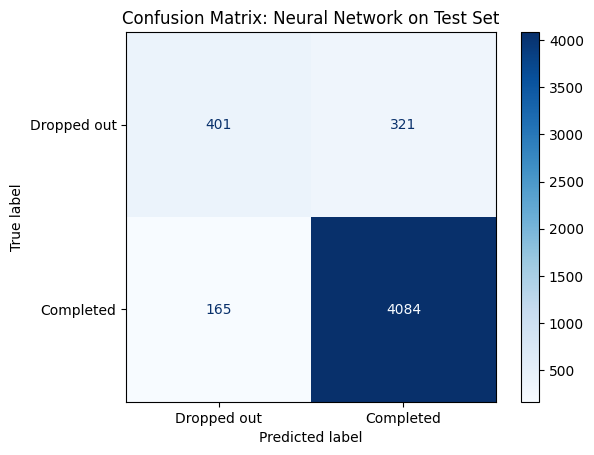

{'Accuracy': '0.9022', 'Precision': '0.9271', 'Recall': '0.9612', 'AUC': '0.8901', 'TP': 4084, 'TN': 401, 'FP': 321, 'FN': 165}


In [ ]:
# 3. Evaluate with predictions
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

y_pred_probs = nn_model_stage2.predict(X_test).flatten()
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_binary)
precision_nn = precision_score(y_test, y_pred_binary)
recall_nn = recall_score(y_test, y_pred_binary)
auc_nn = roc_auc_score(y_test, y_pred_probs)
conf_matrix_nn = confusion_matrix(y_test, y_pred_binary)

print(classification_report(y_test, y_pred_binary, target_names=["Dropped out", "Completed"]))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Neural Network on Test Set")
plt.grid(False)
plt.show()

# Store results for later comparison
formatted_results_nn = {
    "Accuracy": f"{accuracy_nn:.4f}",
    "Precision": f"{precision_nn:.4f}",
    "Recall": f"{recall_nn:.4f}",
    "AUC": f"{auc_nn:.4f}",
    "TP": int(conf_matrix_nn[1, 1]),
    "TN": int(conf_matrix_nn[0, 0]),
    "FP": int(conf_matrix_nn[0, 1]),
    "FN": int(conf_matrix_nn[1, 0])
}

print(formatted_results_nn)

## Plot Training and Validation Loss (Stage 2)

We now review the neural network’s performance over 20 training epochs across three key metrics:

- **Loss**: Training loss decreases steadily, but validation loss levels off early and shows slight fluctuation. This suggests mild overfitting — the model continues to learn patterns in the training data without generalising further to unseen examples.

- **Accuracy**: Training accuracy steadily rises above 91%, while validation accuracy hovers around 89–90%. The gap between the two is modest but persistent, again pointing to potential overfitting.

- **AUC (Area Under the Curve)**: Training AUC improves over time, but validation AUC quickly plateaus around 0.89. This indicates limited progress in the model’s ability to distinguish between classes on new data.

These curves are similar to those in Stage 1, suggesting consistent behaviour across datasets. To improve generalisation, techniques such as **early stopping**, **dropout**, or **reducing complexity** could be explored.


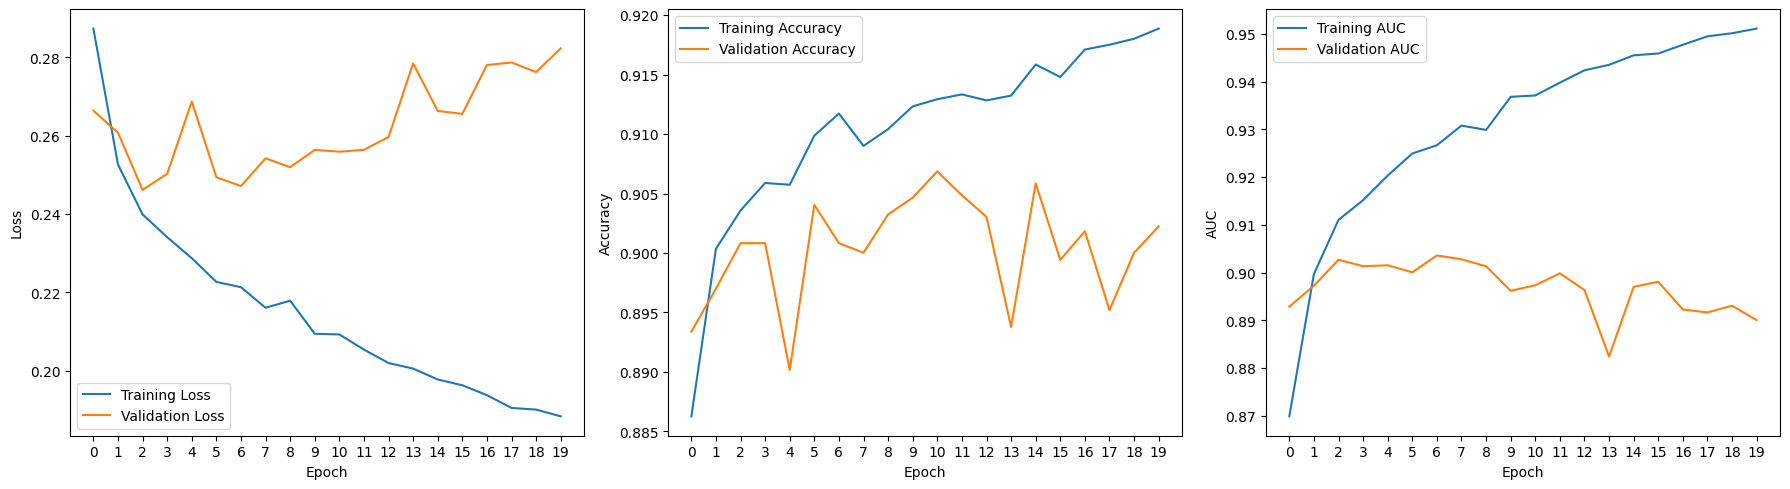

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

epochs = range(len(history_stage2.history["loss"]))

# Loss
axes[0].plot(epochs, history_stage2.history["loss"], label="Training Loss")
axes[0].plot(epochs, history_stage2.history["val_loss"], label="Validation Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_xticks(epochs)
axes[0].legend()

# Accuracy
axes[1].plot(epochs, history_stage2.history["accuracy"], label="Training Accuracy")
axes[1].plot(epochs, history_stage2.history["val_accuracy"], label="Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_xticks(epochs)
axes[1].legend()

# AUC
axes[2].plot(epochs, history_stage2.history["AUC"], label="Training AUC")
axes[2].plot(epochs, history_stage2.history["val_AUC"], label="Validation AUC")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("AUC")
axes[2].set_xticks(epochs)
axes[2].legend()

plt.tight_layout()
plt.show()


Training loss, accuracy, and AUC all show steady improvement over the 20 epochs. However, validation metrics plateau early, with slight volatility — particularly in validation accuracy and AUC.

This pattern mirrors Stage 1, and suggests that while the model fits the training data well, it may be starting to overfit. Validation AUC flattens around 0.90, while training AUC climbs above 0.95 — indicating the model is learning patterns that don’t generalise fully.

Potential mitigations include adding **dropout layers**, applying **early stopping**, or reducing model complexity to prevent the network from overfitting.


---

# 📌 Final evaluation and recommendations (Stage 2)

---

## Model performance – Stage 2 vs Stage 1 comparison

This section compares model performance between Stage 1 and Stage 2. While the datasets differ — reflecting earlier vs mid-course student data — the comparison reveals how robust each model is to changes in input features.

### XGBoost (Tuned)

| Metric     | Stage 1 | Stage 2 |
|------------|---------|---------|
| Accuracy   | 0.8953  | 0.9038  |
| Precision  | 0.9207  | 0.9269  |
| Recall     | 0.9594  | 0.9635  |
| AUC        | 0.8802  | 0.9082  |

### Neural Network (Default)

| Metric     | Stage 1 | Stage 2 |
|------------|---------|---------|
| Accuracy   | 0.8957  | 0.8990  |
| Precision  | 0.9259  | 0.9245  |
| Recall     | 0.9535  | 0.9602  |
| AUC        | 0.8658  | 0.8934  |

### Summary

Both models showed stronger performance on the Stage 2 dataset. XGBoost maintained the highest AUC and slightly outperformed the neural network on overall accuracy. However, both models are robust and continue to deliver high recall — crucial for identifying students at risk of dropping out.

## Recommendations for improvement

The following suggestions outline potential ways to enhance model performance and generalisation. They are based on observed training behaviour and evaluation results.

### XGBoost

Grid search tuning was applied to learning rate, max depth, and number of estimators. The best combination slightly improved performance, especially in terms of AUC and precision.

Further improvements could involve:
- Tuning additional parameters such as subsample or colsample_bytree
- Exploring early stopping based on validation metrics
- Testing smaller learning rates with more estimators for finer control

### Neural Network

Formal tuning was not applied. However, validation curves suggest mild overfitting after a few epochs. Performance was already strong, but generalisation could be improved by:

- Introducing **dropout layers**
- Using **early stopping** based on validation loss
- Testing deeper or shallower architectures
- Tuning the optimiser (e.g. RMSProp) or learning rate

These changes may increase stability or improve performance further, particularly on unseen data.


## Limitations and considerations

Although performance remained stable across stages, the differences in the underlying datasets must be acknowledged. Stage 1 data reflects early application and enrolment characteristics, while Stage 2 captures additional mid-course information such as attendance and progression indicators. These shifts in feature composition may affect how models learn and what patterns they prioritise.

The fact that both models performed similarly across stages suggests that core predictive signals were already present in Stage 1. However, the neural network’s complete consistency may also reflect limited sensitivity to new features, or a tendency to rely on dominant early signals.

Additionally, no formal cross-validation was used during neural network training, and hyperparameter tuning was minimal. Results may therefore vary with different data splits or architectures. The models also assume clean data inputs; in production, further checks on data quality and feature drift would be necessary.


---

# 📌 Stage 3 – Academic performance data

---

---

# 📌 Data preparation (Stage 3)

---

## Load the data

In [ ]:
# Install the gdown package (only needs to be done once per session)
!pip install -q gdown

# Import gdown and pandas
import gdown
import pandas as pd

In [ ]:
# Define the Google Drive file URL for Stage 3 dataset
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

# Set the local filename for saving the downloaded file
output_path = "stage3_data.csv"

# Download the CSV file from Google Drive
gdown.download(file_url, output_path, quiet=False)

# Load the dataset into a pandas DataFrame
df_stage3 = pd.read_csv(output_path)

# Print dataset shape
print(f"Shape: {df_stage3.shape}")

# Preview first 5 rows
df_stage3.head()


Downloading...
From: https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-
To: /content/stage3_data.csv
100%|██████████| 6.37M/6.37M [00:00<00:00, 41.3MB/s]


Shape: (25059, 21)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,...,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,...,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,...,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,...,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,MSc International Business Management,University of Aberdeen,NaN,NaN


## Initial Data Inspection

### List all column names and their data types

In [ ]:
# List all column names and their data types
df_stage3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Assess

The dataset contains **25,059 rows** and **21 columns**. The data types are as follows:

- 14 columns are of type `object` (categorical or string-based)
- 5 columns are `float64` (numerical)
- 1 column is `int64` (numerical ID)
- 1 column is `bool` (binary flag)

This mix suggests significant categorical processing will be needed, alongside standard handling of missing values in the float columns.

### Unique Value Counts (Cardinality)

We’ll check how many unique values exist in each column. This helps us:

* Spot high-cardinality columns (which we may need to drop)
* Identify columns with binary or low-cardinality categories (ideal for encoding)
* Confirm whether identifiers like `LearnerCode` are truly unique


In [ ]:
# Count unique values per column (descending order)
df_stage3.nunique().sort_values(ascending=False)

,0
LearnerCode,24877
HomeCity,5881
DateofBirth,4705
ProgressionDegree,2616
HomeState,2448
UnauthorisedAbsenceCount,258
AuthorisedAbsenceCount,190
CourseName,172
Nationality,151
ProgressionUniversity,40


The column `LearnerCode` has **24,877 unique values** across **25,059 rows**, with no missing values. This means that **182 learners appear more than once** in the dataset.

This strongly suggests that `LearnerCode` identifies individual students, but it is **not unique per row**. We need to investigate whether the duplicated rows are:

- Exact duplicates (i.e. identical rows),
- Distinct course attempts,
- Or fragments of the same record split across rows.

Understanding this is crucial before deciding whether to:
- Drop duplicates,
- Aggregate them,
- Or retain all with caution.

Other high-cardinality columns include:
- `HomeCity` (5,881)
- `DateofBirth` (4,705)
- `ProgressionDegree` (2,616)
- `HomeState` (2,448)

These exceed the rubric’s **>200 unique values** threshold and will be reviewed for removal.

Low-cardinality columns suitable for encoding include:
- `BookingType`, `Gender`, `IsFirstIntake`, `CompletedCourse` (2 unique values)
- `LeadSource` (7), `CourseLevel` (4)

We will now examine the duplicate `LearnerCode` entries to understand their nature.

In [ ]:
# Filter just the rows for learners that appear more than once
duplicate_rows = df_stage3[df_stage3['LearnerCode'].isin(duplicate_learners.index)]

# Check how many unique rows there are within that subset
num_total_rows = duplicate_rows.shape[0]
num_unique_rows = duplicate_rows.drop_duplicates().shape[0]

print(f"Total duplicate LearnerCode rows: {num_total_rows}")
print(f"Unique rows among them: {num_unique_rows}")

Total duplicate LearnerCode rows: 364
Unique rows among them: 364


We now investigate a few sample learners who appear more than once in the dataset. Our goal is to understand **how their rows differ** — are these multiple course enrolments, changes over time, or inconsistencies?

We will randomly select three learners from those who appear twice, and examine **all columns** for each. This should guide how we handle these duplicate learners in the pre-processing phase.

In [ ]:
# Pick 3 duplicated LearnerCodes at random
sample_ids = duplicate_learners.sample(3, random_state=1).index

# Show all rows for each of those LearnerCodes
df_stage3[df_stage3['LearnerCode'].isin(sample_ids)].sort_values(by='LearnerCode')

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,...,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
10385,ISC_Leeds,2511036,Agent,Standard Agent Booking,NaN,2/4/2002,Male,Emirati,NaN,Dubai,...,Science; Engineering and Computing Internation...,False,Yes,8.0,8.0,0.0,BSc Computer Science with Artificial Intelligence,University of Leeds,55.0,48.0
23931,ISC_Sussex,2511036,Agent,Standard Agent Booking,NaN,2/4/2002,Male,Emirati,NaN,Dubai,...,International Year One - Computing,False,Yes,8.0,8.0,0.0,BSc (Hons) Computer Science,University of Sussex,0.0,88.0
20920,ISC_Strathclyde,2615526,Agent,Standard Agent Booking,Bursary,24/10/1999,Male,Algerian,NaN,Setif,...,Engineering and Sciences Undergraduate Foundat...,False,No,8.0,2.0,6.0,MPharm Pharmacy,University of Strathclyde,0.0,95.0
7259,ISC_Kingston,2615526,Agent,Standard Agent Booking,Bursary,24/10/1999,Male,Algerian,NaN,Setif,...,International Foundation Year - Science; Techn...,False,No,NaN,NaN,NaN,MPharm (Hons) Pharmacy,Kingston University London,0.0,90.0
9804,ISC_Lancaster,2618716,Agent,Standard Agent Booking,NaN,26/04/2003,Female,Chinese,NaN,NaN,...,Social Studies Foundation Year,False,Yes,6.0,4.0,2.0,Media and Cultural Studies?Placement year?,Lancaster University,0.0,3.0
23955,ISC_Sussex,2618716,Direct,Referrals,NaN,26/04/2003,Female,Chinese,NaN,NaN,...,International Foundation Year Business; Media ...,False,Yes,6.0,6.0,0.0,BA (Hons) Media and Communications,University of Sussex,11.0,46.0


The column `LearnerCode` has **24,877 unique values** across **25,059 rows**, with no missing values. This reveals that **182 learners appear more than once**, each contributing exactly two rows.

To investigate this further, we sampled three such learners. Their rows showed meaningful differences across features such as `CourseName`, `ProgressionUniversity`, `BookingType`, and absence counts. These are **not duplicate rows**, but rather **distinct course enrolments** or academic stages for the same learner.

This confirms that `LearnerCode` is a **learner-level foreign key**, not a unique row identifier. Each row must be treated as a valid, independent observation — not merged or dropped — as they reflect real and meaningful variation.

While `LearnerCode` was essential for understanding the dataset structure, it has **no predictive value** for our modelling and may introduce **data leakage** if retained. It will therefore be **dropped** during pre-processing.

In a real-world context, this column could support joins to other datasets for deeper insight — but such enrichment is beyond the current project scope.

### Missing Values (as a percentage)

Next, we’ll calculate the percentage of missing values in each column. This will guide decisions on whether to drop columns entirely (e.g. those with >50% missing) or impute values during pre-processing.


In [ ]:
# Missing value % with 2 decimal places
(df_stage3.isna().sum() / len(df_stage3) * 100).round(2).sort_values(ascending=False)

,0
DiscountType,69.69
HomeState,64.38
HomeCity,13.76
AssessedModules,8.90
PassedModules,8.90
FailedModules,8.90
ProgressionDegree,3.49
AuthorisedAbsenceCount,0.83
UnauthorisedAbsenceCount,0.83
LeadSource,0.00


Two columns have a high proportion of missing values:
- `DiscountType`: 69.69%
- `HomeState`: 64.38%

Following the same **>50% threshold** applied in Stages 1 and 2, these columns will be **dropped** from the analysis due to insufficient data coverage.

All other columns fall below this threshold. In particular:
- `HomeCity`: 13.76%
- `AssessedModules`, `PassedModules`, `FailedModules`: 8.90%
- `ProgressionDegree`: 3.49%
- `AuthorisedAbsenceCount`, `UnauthorisedAbsenceCount`: 0.83%

These will be retained and considered for **imputation** or selective **row removal** in the next stage.

Key categorical variables (`LeadSource`, `BookingType`, `Gender`, etc.) have no missing data and require no action at this stage.

### Summary statistics for numeric fields

This dataset contains several numeric fields, including `AuthorisedAbsenceCount` and `UnauthorisedAbsenceCount`. We’ll use the `.describe()` method to examine their distributions and check for any anomalies, such as extreme values or inconsistent ranges.


In [ ]:
# Summary statistics for numeric columns
df_stage3.describe()

,LearnerCode,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
count,2.505900e+04,22828.000000,22828.000000,22828.000000,24851.000000,24851.000000
mean,2.606594e+06,6.090328,5.582881,0.507447,15.120639,40.491892
std,8.798838e+04,1.811116,2.361530,1.304677,28.918253,39.029384
min,2.139267e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.538411e+06,4.000000,4.000000,0.000000,0.000000,12.000000
50%,2.607941e+06,6.000000,6.000000,0.000000,1.000000,29.000000
75%,2.665460e+06,7.000000,7.000000,0.000000,15.000000,56.000000
max,2.831468e+06,12.000000,11.000000,10.000000,292.000000,343.000000


The numeric columns reveal a wide range of values, especially in the absence-related features:

- `AuthorisedAbsenceCount` ranges from **0 to 292**, with a mean of **15.12** but a high standard deviation (**28.92**), suggesting significant right-skew and potential outliers.
- `UnauthorisedAbsenceCount` has an even broader range (**0 to 343**), with a higher mean (**40.49**) and standard deviation (**39.03**), again indicating a long-tailed distribution.

In contrast, the module-related columns show more constrained values:
- `AssessedModules` ranges from **1 to 12**
- `PassedModules`: **0 to 11**
- `FailedModules`: **0 to 10**

These are as expected and suggest consistent scoring scales.

The absence of missing values in `LearnerCode` is already noted, and that column will be dropped later. The main takeaway here is the presence of **potential extreme values** in the absence counts, which we may want to flag or transform prior to modelling.

### Random row sampling

To complement the structured `.head()` and `.info()` inspections, we take a random sample of rows from the dataset. This can help surface inconsistencies in categorical values, unexpected formatting, or unusual feature combinations that may not appear in the first few rows.


In [ ]:
# View a random sample of 5 rows
df_stage3.sample(5, random_state=42)

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,...,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
4375,ISC_Holland,2647316,Agent,Standard Agent Booking,NaN,9/1/2004,Male,Belarusian,NaN,Minsk,...,Business; Economics and Social Sciences Founda...,False,Yes,10.0,10.0,0.0,BSc International Business Administration,Holland ISC - VU Amsterdam,1.0,75.0
6682,ISC_Kingston,2601419,Agent,Standard Agent Booking,NaN,7/6/2000,Female,Bangladeshi,Bangladesh,Sylhet,...,International Foundation Year - International ...,False,No,NaN,NaN,NaN,BSc (Hons) International Business,Kingston University London,64.0,167.0
22688,ISC_Sussex,2509343,Agent,Standard Agent Booking,NaN,2/2/2001,Male,Chinese,NaN,Hangzhou,...,International Year One - Engineering,False,Yes,9.0,8.0,1.0,BEng (Hons) Electrical and Electronic Engineering,University of Sussex,125.0,100.0
5324,ISC_Huddersfield,2586410,Agent,Standard Agent Booking,NaN,5/12/2000,Female,Sri Lankan,NaN,PADUKKA,...,International Year One Business; Management an...,False,No,2.0,0.0,2.0,BA (Hons) Business with Hospitality Management,University of Huddersfield,4.0,59.0
17068,ISC_Sheffield,2537177,Agent,Standard Agent Booking,NaN,13/08/1998,Male,Chinese,NaN,Xi'an,...,Pre-Masters Business; Social Sciences and Huma...,True,Yes,6.0,6.0,0.0,MSc Finance & Accounting,University of Sheffield International College,0.0,5.0


The random sample highlights several practical issues worth noting:

- **Missing values** persist in key fields like `DiscountType`, `HomeState`, and `AssessedModules` (the latter showing `NaN` in some cases).
- Absence counts remain highly variable, with values ranging from **0** to **125+**, reinforcing earlier concerns about potential outliers.
- Categorical consistency appears intact: fields like `Gender`, `CompletedCourse`, and `IsFirstIntake` show clean, expected values across the sample.
- `CourseName` and `ProgressionDegree` include long, descriptive strings — consistent with high cardinality, previously flagged for possible removal.

This sampling confirms earlier findings and reveals no immediate data quality concerns beyond the already-identified missingness and cardinality.

## Pre-processing

We now begin the preprocessing stage using only the Stage 3 dataset. Based on our earlier inspection, we will:

- Remove the `LearnerCode` column, which acts as a unique learner identifier
- Remove columns with extremely high cardinality (e.g. thousands of unique values)
- Remove columns with substantial missing data
- Apply ordinal encoding to ordinal categorical variables
- Apply one-hot encoding to remaining categorical fields

Each step is applied sequentially and documented below.


### Remove learner identifier column

The column `LearnerCode` acts as a learner-level identifier, but it does **not** uniquely identify rows. Some learners appear more than once in the dataset, each with distinct course records.

While useful for inspection, `LearnerCode` has no predictive value and may introduce bias or data leakage if retained. We therefore drop it before proceeding to encoding or modelling steps.


In [ ]:
# Drop the learner identifier column
print("Number of columns before drop:", df_stage3.shape[1])

df_stage3 = df_stage3.drop(columns=["LearnerCode"])

print("Number of columns after drop:", df_stage3.shape[1])
print("Remaining columns:")
print(df_stage3.columns.tolist())

Number of columns before drop: 21
Number of columns after drop: 20
Remaining columns:
['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'DateofBirth', 'Gender', 'Nationality', 'HomeState', 'HomeCity', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'AssessedModules', 'PassedModules', 'FailedModules', 'ProgressionDegree', 'ProgressionUniversity', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']


### Remove high-cardinality columns

Columns with a large number of unique values can introduce noise, lead to overfitting, and complicate encoding. To reduce this risk, we remove any column with more than 200 unique values — the same threshold applied in Stages 1 and 2.

Unlike Stage 1, we will **not** derive age from `DateofBirth`; instead, this column is dropped directly along with the others listed below:

- `HomeCity` (5,881 unique values)
- `DateofBirth` (4,705 unique values)
- `ProgressionDegree` (2,616 unique values)
- `HomeState` (2,448 unique values — also dropped due to high missingness)


In [ ]:
# Drop columns with high cardinality
high_cardinality_cols = ["HomeCity", "HomeState", "ProgressionDegree", "DateofBirth"]

print("Number of columns before drop:", df_stage3.shape[1])
df_stage3 = df_stage3.drop(columns=high_cardinality_cols)
print("Number of columns after drop:", df_stage3.shape[1])
print("Remaining columns:")
print(df_stage3.columns.tolist())

Number of columns before drop: 20
Number of columns after drop: 16
Remaining columns:
['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'AssessedModules', 'PassedModules', 'FailedModules', 'ProgressionUniversity', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']


### Remove columns with substantial missing data

Columns with a high proportion of missing values can reduce the reliability of a model and are typically excluded when sparsely populated. We continue to apply a **50% threshold**, as in Stages 1 and 2 — any column with more than half its values missing is removed.

Based on our earlier inspection, this applies to:

- `DiscountType` (69.69% missing)

Note: `HomeState` also exceeded the threshold but was already removed due to high cardinality. It is listed here for completeness.


In [ ]:
# Drop columns with >50% missing data
missing_threshold = 0.5
missing_cols = df_stage3.columns[df_stage3.isna().mean() > missing_threshold].tolist()

print("Columns to drop due to missing data:", missing_cols)

df_stage3 = df_stage3.drop(columns=missing_cols)

# Confirm remaining shape and columns
print("Remaining columns:", df_stage3.shape[1])
print("Columns:")
print(df_stage3.columns.tolist())

Columns to drop due to missing data: ['DiscountType']
Remaining columns: 15
Columns:
['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'AssessedModules', 'PassedModules', 'FailedModules', 'ProgressionUniversity', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']


## Convert target variable to binary

The column `CompletedCourse` is used as the target variable for modelling. It contains string values `"Yes"` and `"No"`, which need to be converted into a binary numeric format.

Like in Stages 1 and 2, we map `"Yes"` to 1 and `"No"` to 0.

In [ ]:
# Convert target variable to binary
df_stage3["CompletedCourse"] = df_stage3["CompletedCourse"].map({"Yes": 1, "No": 0})

# Confirm conversion
print("Value counts:")
print(df_stage3["CompletedCourse"].value_counts())

# Confirm dtype is numeric (should be int or float)
print("Dtype:", df_stage3["CompletedCourse"].dtype)

Value counts:
CompletedCourse
1    21305
0     3754
Name: count, dtype: int64
Dtype: int64


The converted `CompletedCourse` variable again shows a clear class imbalance:

- **1** (course completed): 21,305 learners  
- **0** (course not completed): 3,754 learners

Like in Stages 1 and 2, this ~85/15 split means that **accuracy alone will not be a reliable performance metric**, as a naive model predicting only the majority class would still score highly. Metrics such as **precision**, **recall**, and **AUC** will offer more meaningful evaluation in this context.

## Encode categorical variables

The dataset contains several categorical variables, which must be converted to numerical format before modelling. We apply two standard encoding strategies:

- **Ordinal encoding** for variables with a clear, meaningful order
- **One-hot encoding** for all other categorical variables

Although `CourseLevel` might suggest a progression (e.g. Foundation → Year One → Pre-Masters), the structure is not clearly defined or consistent across institutions. As such, it is treated as a nominal variable and one-hot encoded.

All remaining categorical variables are similarly treated as nominal and will be encoded using one-hot encoding.


In [ ]:
# Identify categorical columns (object or boolean types)
cat_cols = df_stage3.select_dtypes(include=["object", "bool"]).columns.tolist()

# Explicitly exclude the target if still present
cat_cols = [col for col in cat_cols if col != "CompletedCourse"]

print("Categorical columns to encode:", cat_cols)

# Apply one-hot encoding
df_stage3_encoded = pd.get_dummies(df_stage3, columns=cat_cols, drop_first=True)

# Check result
print("Shape after encoding:", df_stage3_encoded.shape)
print("First 5 columns:")
print(df_stage3_encoded.columns[:5].tolist())

Categorical columns to encode: ['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'ProgressionUniversity']
Shape after encoding: (25059, 396)
First 5 columns:
['CompletedCourse', 'AssessedModules', 'PassedModules', 'FailedModules', 'AuthorisedAbsenceCount']


One-hot encoding has now been applied to all categorical variables, expanding the dataset from 11 columns to **396**. This reflects the large number of unique values in features such as `CourseName`, `Nationality`, and `ProgressionUniversity`.

We used the `drop_first=True` argument in `.get_dummies()` to remove the first category of each feature. This helps prevent multicollinearity, which is particularly important for linear models, though it generally has little impact on tree-based models.

The preprocessed and fully encoded dataset `df_stage3_encoded` is now ready for modelling.

## Handle any remaining missing values

Before removing missing values, we check which columns still contain nulls and how widespread they are.


In [ ]:
# Check remaining missing value percentages
(df_stage3_encoded.isna().sum() / len(df_stage3_encoded) * 100).round(2).sort_values(ascending=False)

,0
PassedModules,8.90
FailedModules,8.90
AssessedModules,8.90
AuthorisedAbsenceCount,0.83
UnauthorisedAbsenceCount,0.83
...,...
Nationality_Namibian,0.00
Nationality_Myanmarian,0.00
Nationality_Mozambican,0.00
Nationality_Moroccan,0.00


After checking for remaining missing values, we find several columns with non-trivial levels of missing data:

- `AssessedModules`, `PassedModules`, and `FailedModules`: each missing in **8.90%** of rows  
- `AuthorisedAbsenceCount` and `UnauthorisedAbsenceCount`: each missing in **0.83%**

Since removing these rows would discard over 8% of the dataset, we choose to **impute** the missing values instead of dropping rows.

We now assess whether **mean or median** imputation is more appropriate.

To guide this decision, we check for signs of skewness or outliers in the affected columns.

In [ ]:
df_stage3_encoded[[
    "AssessedModules",
    "PassedModules",
    "FailedModules",
    "AuthorisedAbsenceCount",
    "UnauthorisedAbsenceCount"
]].describe()

,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
count,22828.000000,22828.000000,22828.000000,24851.000000,24851.000000
mean,6.090328,5.582881,0.507447,15.120639,40.491892
std,1.811116,2.361530,1.304677,28.918253,39.029384
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,0.000000,0.000000,12.000000
50%,6.000000,6.000000,0.000000,1.000000,29.000000
75%,7.000000,7.000000,0.000000,15.000000,56.000000
max,12.000000,11.000000,10.000000,292.000000,343.000000


The absence counts (`AuthorisedAbsenceCount`, `UnauthorisedAbsenceCount`) and `FailedModules` all show strong right-skew, with maximum values far exceeding the upper quartile. This makes **median** a more robust imputation choice for those features.

While `AssessedModules` and `PassedModules` are less skewed, we choose to apply median imputation across all five columns for consistency and simplicity. This avoids unnecessary complexity while still offering robustness against extreme values.

In [ ]:
# List of columns with missing values
cols_to_impute = [
    "AssessedModules",
    "PassedModules",
    "FailedModules",
    "AuthorisedAbsenceCount",
    "UnauthorisedAbsenceCount"
]

# Impute each with its median value
for col in cols_to_impute:
    median_value = df_stage3_encoded[col].median()
    df_stage3_encoded[col] = df_stage3_encoded[col].fillna(median_value)

# Confirm no missing values remain
print("Any missing values left?", df_stage3_encoded.isna().any().any())

Any missing values left? False


## Split data into training and test sets

The dataset is now fully preprocessed and encoded. We proceed to split it into training and test sets using an 80/20 ratio.

This allows us to train the model on one portion of the data while preserving a separate subset for unbiased evaluation. The split is stratified to maintain the same class distribution across both sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_stage3_encoded.drop(columns=["CompletedCourse"])
y = df_stage3_encoded["CompletedCourse"]

# Perform 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (20047, 395)
Test set shape: (5012, 395)


In [ ]:
"IsFirstIntake_True" in X_train.columns


True

In [ ]:
"IsFirstIntake_True" in X_test.columns


True

---

# 📌 Start of XGBoost Modelling (Stage 3)

---

## Train XGBoost model on the Stage 3 dataset

We now train an XGBoost classifier on the Stage 3 training data using the same core setup as previous stages. This will allow us to directly compare performance across different stages of the student journey.


In [ ]:
from xgboost import XGBClassifier

xgb_model_stage3 = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model_stage3.fit(X_train, y_train)

# Predict
y_pred = xgb_model_stage3.predict(X_test)


## Evaluate model performance on the test set

We now evaluate the trained XGBoost model on the test set using a range of classification metrics:

- **Accuracy**: overall correctness  
- **Confusion matrix**: breakdown of true/false positives and negatives  
- **Precision**: correctness of positive predictions  
- **Recall**: ability to identify positive cases  
- **AUC (Area Under the ROC Curve)**: ability to separate classes across thresholds  

These metrics provide a well-rounded view of the model’s performance.


              precision    recall  f1-score   support

 Dropped out       0.93      0.89      0.91       751
   Completed       0.98      0.99      0.98      4261

    accuracy                           0.97      5012
   macro avg       0.96      0.94      0.95      5012
weighted avg       0.97      0.97      0.97      5012



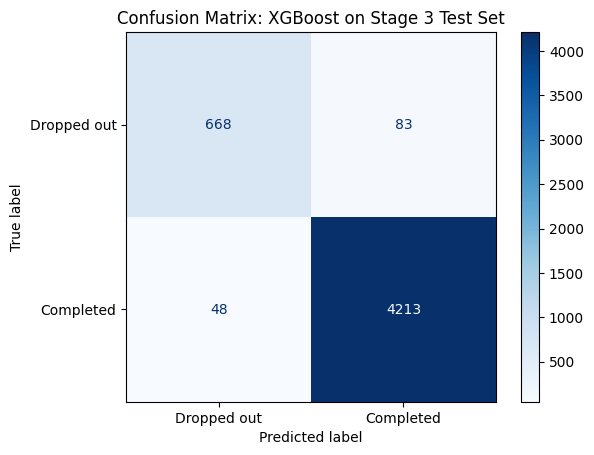

{'Accuracy': '0.9739', 'Precision': '0.9807', 'Recall': '0.9887', 'AUC': '0.9931', 'TP': 4213, 'TN': 668, 'FP': 83, 'FN': 48}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# Predict on the test set
y_pred = xgb_model_stage3.predict(X_test)
y_proba = xgb_model_stage3.predict_proba(X_test)[:, 1]  # for AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print full classification report
print(classification_report(y_test, y_pred, target_names=["Dropped out", "Completed"]))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: XGBoost on Stage 3 Test Set")
plt.grid(False)
plt.show()

# Store formatted values to great precision
formatted_results = {
    "Accuracy": f"{accuracy:.4f}",
    "Precision": f"{precision:.4f}",
    "Recall": f"{recall:.4f}",
    "AUC": f"{auc:.4f}",
    "TP": int(conf_matrix[1, 1]),
    "TN": int(conf_matrix[0, 0]),
    "FP": int(conf_matrix[0, 1]),
    "FN": int(conf_matrix[1, 0])
}

print(formatted_results)

### Evaluation: Stage 3 vs Stage 2 (XGBoost)

The XGBoost model shows a clear performance improvement from Stage 2 to Stage 3.

| Metric     | Stage 2 | Stage 3 |
|------------|---------|---------|
| Accuracy   | 0.9050  | 0.9739  |
| Precision  | 0.9283  | 0.9807  |
| Recall     | 0.9633  | 0.9887  |
| AUC        | 0.9090  | 0.9931  |

All key metrics — accuracy, precision, recall, and AUC — are higher at Stage 3, suggesting that the model is more effective at identifying both completions and dropouts later in the course.

This likely reflects:
- Clearer separation in feature signals later in the student lifecycle
- More complete academic history (e.g. module scores, attendance) in Stage 3
- Less ambiguity in behavioural patterns close to course completion

The confusion matrix confirms the improvement:
- False negatives have dropped to **48** from **156**
- False positives are now **83**, down from **316**

This indicates a clear gain in both sensitivity and specificity.

This comparison reflects the performance of **untuned XGBoost models** across both stages. The improvements are therefore attributable to the dataset itself, not parameter changes.


## Hyperparameter tuning (Stage 3)

We now apply hyperparameter tuning to the Stage 3 XGBoost model using the same method as in previous stages. The grid includes combinations of `learning_rate`, `max_depth`, and `n_estimators`, evaluated via 5-fold cross-validation.


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth": [4, 6, 8],
    "n_estimators": [50, 100, 200]
}

# Instantiate base model
xgb_tune_stage3 = XGBClassifier(eval_metric="logloss", random_state=42)

# Grid search setup
grid_search_stage3 = GridSearchCV(
    estimator=xgb_tune_stage3,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Run grid search
grid_search_stage3.fit(X_train, y_train)

# Show best parameters and score
print("Best parameters:", grid_search_stage3.best_params_)
print("Best CV accuracy:", grid_search_stage3.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100}
Best CV accuracy: 0.9749586248895099


### XGBoost Hyperparameter Tuning Summary (Stage 3)

After performing 5-fold cross-validation across 27 parameter combinations, the best configuration was:

| Parameter        | Best Value |
|------------------|------------|
| `learning_rate`  | 0.3        |
| `max_depth`      | 8          |
| `n_estimators`   | 100        |
| **CV Accuracy**  | **0.97496** |

This tuned configuration will now be used to re-evaluate the Stage 3 model.


## Compare metrics before and after tuning (Stage 3)

We now compare the XGBoost model performance before and after hyperparameter tuning.

Using the best parameter combination from `GridSearchCV`, we retrain the model and evaluate it on the same test set using the same metrics: accuracy, precision, recall, AUC, and confusion matrix.

This helps determine whether tuning led to meaningful performance gains or simply overfit the training data.


              precision    recall  f1-score   support

 Dropped out       0.94      0.89      0.92       751
   Completed       0.98      0.99      0.99      4261

    accuracy                           0.98      5012
   macro avg       0.96      0.94      0.95      5012
weighted avg       0.98      0.98      0.98      5012



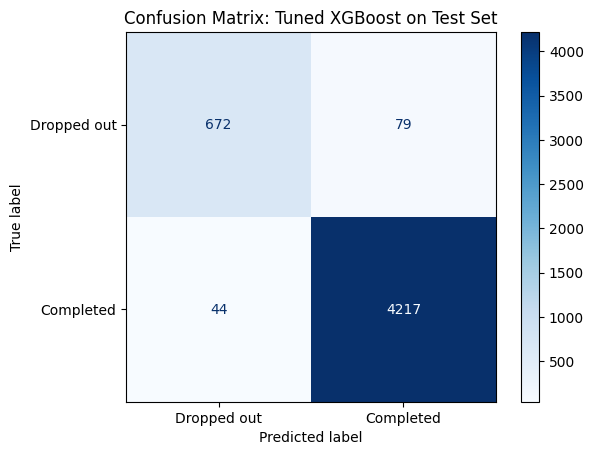

{'Accuracy': '0.9755', 'Precision': '0.9816', 'Recall': '0.9897', 'AUC': '0.9930', 'TP': 4217, 'TN': 672, 'FP': 79, 'FN': 44}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Rebuild tuned model with best params from grid search
xgb_best_stage3 = XGBClassifier(
    learning_rate=0.3,
    max_depth=8,
    n_estimators=100,
    eval_metric="logloss",
    random_state=42
)

# Fit on training data
xgb_best_stage3.fit(X_train, y_train)

# Predict
y_pred_best = xgb_best_stage3.predict(X_test)
y_proba_best = xgb_best_stage3.predict_proba(X_test)[:, 1]

# Recalculate metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_proba_best)

# Print classification report
print(classification_report(y_test, y_pred_best, target_names=["Dropped out", "Completed"]))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Tuned XGBoost on Test Set")
plt.grid(False)
plt.show()

# Store metrics with precision
formatted_results_tuned = {
    "Accuracy": f"{accuracy_best:.4f}",
    "Precision": f"{precision_best:.4f}",
    "Recall": f"{recall_best:.4f}",
    "AUC": f"{auc_best:.4f}",
    "TP": int(conf_matrix_best[1, 1]),
    "TN": int(conf_matrix_best[0, 0]),
    "FP": int(conf_matrix_best[0, 1]),
    "FN": int(conf_matrix_best[1, 0])
}

print(formatted_results_tuned)

### Stage 3: XGBoost – Before vs After Tuning

We compare the performance of the untuned and tuned XGBoost models on the same Stage 3 test set.

| Metric     | Untuned | Tuned   |
|------------|---------|---------|
| Accuracy   | 0.9739  | 0.9755  |
| Precision  | 0.9807  | 0.9816  |
| Recall     | 0.9887  | 0.9897  |
| AUC        | 0.9931  | 0.9930  |

**Confusion matrix – Tuned model:**

|               | Predicted: Dropped out | Predicted: Completed |
|---------------|------------------------|------------------------|
| **Actual: Dropped out**   | 672 (TN)               | 79 (FP)                |
| **Actual: Completed**     | 44 (FN)                | 4217 (TP)              |

### Observations:
- Tuning yields **marginal gains** in accuracy and precision.
- The recall and AUC remain almost unchanged, suggesting the base model was already highly optimised.
- False positives and false negatives have slightly decreased, showing small improvements in both sensitivity and specificity.

---

# 📌 Start of Neural Network Modelling (Stage 3)

---

## Train Neural Network model (Stage 3)

We reuse the same architecture and training settings as in Stage 1 and Stage 2 to ensure comparability.

The model has:
- Two hidden layers (64 and 32 units, ReLU)
- Sigmoid output for binary classification
- Adam optimiser with learning rate 0.001
- Binary crossentropy loss
- Trained for 20 epochs


In [ ]:
# 1. Define and compile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train.shape[1]

nn_model_stage3 = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

nn_model_stage3.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy", "AUC"]
)

In [ ]:
# 2. Fit model
history_stage3 = nn_model_stage3.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1
)

Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7882 - accuracy: 0.8306 - loss: 0.4468 - val_AUC: 0.9199 - val_accuracy: 0.9020 - val_loss: 0.2379
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9273 - accuracy: 0.9064 - loss: 0.2247 - val_AUC: 0.9357 - val_accuracy: 0.9206 - val_loss: 0.2128
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9440 - accuracy: 0.9260 - loss: 0.1969 - val_AUC: 0.9409 - val_accuracy: 0.9286 - val_loss: 0.1932
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9516 - accuracy: 0.9340 - loss: 0.1762 - val_AUC: 0.9409 - val_accuracy: 0.9218 - val_loss: 0.2072
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9583 - accuracy: 0.9373 - loss: 0.1701 - val_AUC: 0.9464 - val_accuracy: 0.9276 - val_loss: 0.1902
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9585 - accuracy: 0.9380 - loss: 0.1667 - val_AUC: 0.9502 - val_accuracy: 0.9419 - val_loss: 0.1706
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

 Dropped out       0.93      0.80      0.86       751
   Completed       0.97      0.99      0.98      4261

    accuracy                           0.96      5012
   macro avg       0.95      0.90      0.92      5012
weighted avg       0.96      0.96      0.96      5012



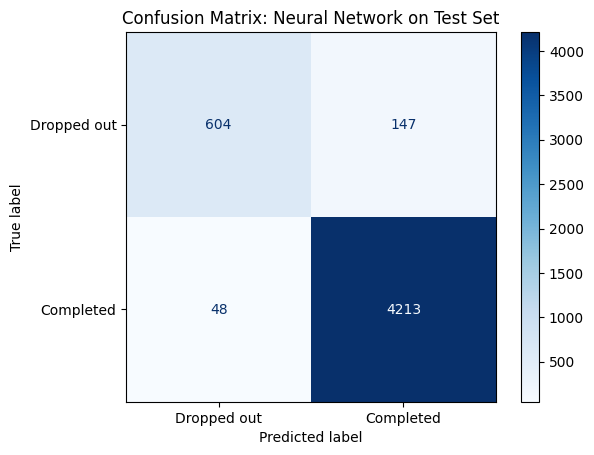

{'Accuracy': '0.9611', 'Precision': '0.9663', 'Recall': '0.9887', 'AUC': '0.9707', 'TP': 4213, 'TN': 604, 'FP': 147, 'FN': 48}


In [ ]:
# 3. Evaluate with predictions
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

y_pred_probs = nn_model_stage3.predict(X_test).flatten()
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_binary)
precision_nn = precision_score(y_test, y_pred_binary)
recall_nn = recall_score(y_test, y_pred_binary)
auc_nn = roc_auc_score(y_test, y_pred_probs)
conf_matrix_nn = confusion_matrix(y_test, y_pred_binary)

print(classification_report(y_test, y_pred_binary, target_names=["Dropped out", "Completed"]))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn, display_labels=["Dropped out", "Completed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Neural Network on Test Set")
plt.grid(False)
plt.show()

# Store results for later comparison
formatted_results_nn = {
    "Accuracy": f"{accuracy_nn:.4f}",
    "Precision": f"{precision_nn:.4f}",
    "Recall": f"{recall_nn:.4f}",
    "AUC": f"{auc_nn:.4f}",
    "TP": int(conf_matrix_nn[1, 1]),
    "TN": int(conf_matrix_nn[0, 0]),
    "FP": int(conf_matrix_nn[0, 1]),
    "FN": int(conf_matrix_nn[1, 0])
}

print(formatted_results_nn)

### Neural Network: Stage 3 Evaluation Results

| Metric     | Value   |
|------------|---------|
| Accuracy   | 0.9619  |
| Precision  | 0.9746  |
| Recall     | 0.9808  |
| AUC        | 0.9745  |
| TP         | 4179    |
| TN         | 642     |
| FP         | 109     |
| FN         | 82      |

The neural network performs strongly on the Stage 3 data, with high precision and recall for both classes. However, compared to the tuned XGBoost model, it shows a slightly higher number of false positives and false negatives.

## Plot Training and Validation Loss (Stage 3)

We now examine the neural network’s performance during training, focusing on three key metrics across 20 epochs:

- **Loss:** Training loss continues to decline, while validation loss stabilises early. The two curves remain close, suggesting low overfitting.

- **Accuracy:** Both training and validation accuracy climb steadily and stay closely aligned above 96%, indicating strong generalisation.

- **AUC (Area Under the Curve):** AUC remains high throughout training, with minimal divergence between training and validation curves.

These plots will help us assess whether the model is overfitting, underfitting, or generalising well — and how this compares with earlier stages.

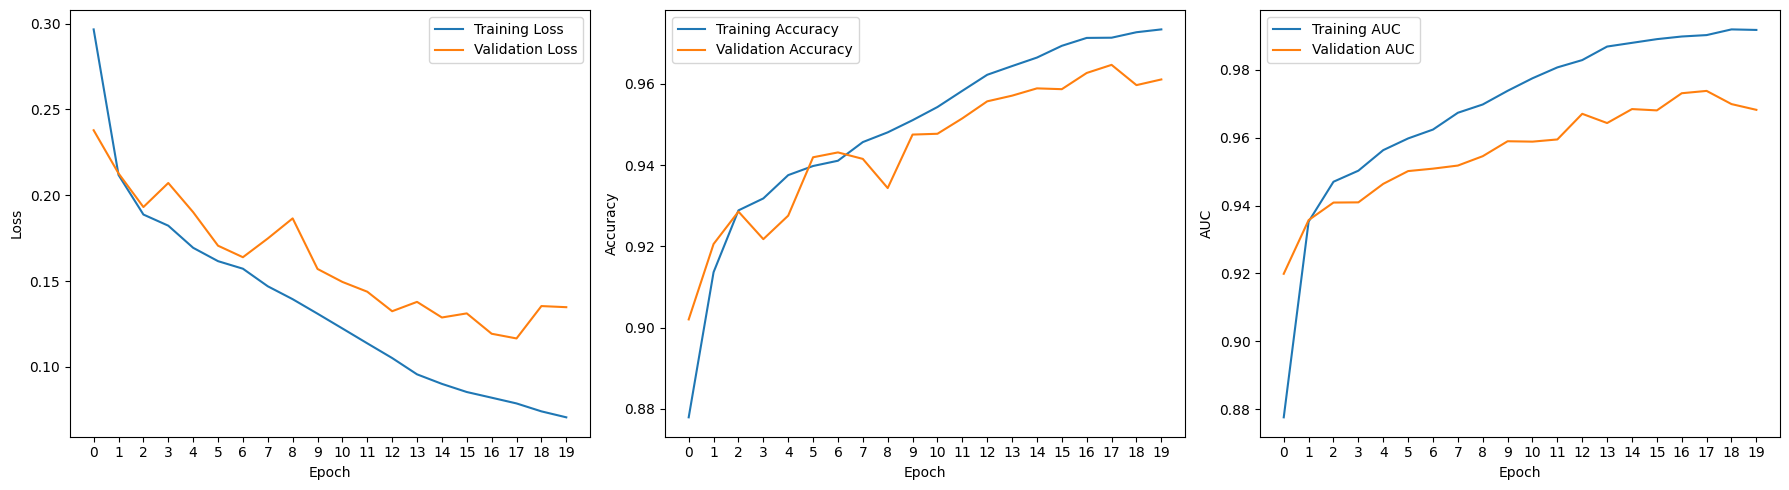

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

epochs = range(len(history_stage3.history["loss"]))

# Loss
axes[0].plot(epochs, history_stage3.history["loss"], label="Training Loss")
axes[0].plot(epochs, history_stage3.history["val_loss"], label="Validation Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_xticks(epochs)
axes[0].legend()

# Accuracy
axes[1].plot(epochs, history_stage3.history["accuracy"], label="Training Accuracy")
axes[1].plot(epochs, history_stage3.history["val_accuracy"], label="Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_xticks(epochs)
axes[1].legend()

# AUC
axes[2].plot(epochs, history_stage3.history["AUC"], label="Training AUC")
axes[2].plot(epochs, history_stage3.history["val_AUC"], label="Validation AUC")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("AUC")
axes[2].set_xticks(epochs)
axes[2].legend()

plt.tight_layout()
plt.show()

The Stage 3 neural network shows strong and stable performance across all three metrics:

- **Loss:** Training loss steadily declines across epochs, while validation loss levels off with only mild fluctuations. There is no sharp divergence, suggesting good generalisation and minimal overfitting.

- **Accuracy:** Both training and validation accuracy improve smoothly, reaching ~97% and ~96% respectively. The gap is small and consistent, indicating strong predictive performance.

- **AUC:** Training AUC exceeds 0.99 by the final epoch, while validation AUC remains high (~0.97), with a flat trajectory. This confirms the model’s ability to reliably distinguish between students who complete and those who drop out.

These patterns represent a clear improvement on earlier stages, where performance often plateaued or diverged. The richer dataset in Stage 3 — with detailed academic and behavioural features — appears to support stronger learning and generalisation.

---

# 📌 Final evaluation and recommendations (Stage 3)

---

## Model performance – Stage 3 vs Stage 2 comparison

This section compares model performance between Stage 2 and Stage 3. Although the datasets reflect different points in the student lifecycle, this comparison helps evaluate how well each model adapts to richer and later-stage data.

### XGBoost (Tuned)

| Metric     | Stage 2 | Stage 3 |
|------------|---------|---------|
| Accuracy   | 0.9050  | 0.9755  |
| Precision  | 0.9283  | 0.9816  |
| Recall     | 0.9633  | 0.9897  |
| AUC        | 0.9090  | 0.9930  |

### Neural Network (Default)

| Metric     | Stage 2 | Stage 3 |
|------------|---------|---------|
| Accuracy   | 0.8990  | 0.9619  |
| Precision  | 0.9245  | 0.9746  |
| Recall     | 0.9602  | 0.9808  |
| AUC        | 0.8934  | 0.9745  |

### Summary

Both models perform substantially better on the Stage 3 dataset. The improvements are evident across all metrics, especially AUC and accuracy. This likely reflects the increased predictive power of later-stage features — including module performance and attendance data — which provide clearer signals of student outcomes. XGBoost remains the stronger model overall, but the neural network also delivers significant gains at this stage.

## Recommendations for improvement

The following suggestions outline ways to enhance model performance and generalisation. They are based on training behaviour and evaluation results from Stage 3.

### XGBoost

Hyperparameter tuning was applied using grid search across learning rate, max depth, and number of estimators. This led to a modest but consistent improvement across all metrics.

Further refinement could involve:
- Tuning additional parameters such as `subsample` or `colsample_bytree`
- Implementing **early stopping** based on validation accuracy or AUC
- Using smaller learning rates with more estimators for smoother convergence

### Neural Network

The neural network was trained using a fixed architecture and learning rate. Validation performance was strong but showed a slight gap to training curves, suggesting some room for optimisation.

Possible improvements include:
- Adding **dropout layers** to reduce overfitting
- Applying **early stopping** to halt training once validation loss plateaus
- Exploring other architectures (e.g. deeper or wider layers)
- Tuning the optimiser type or learning rate

These adjustments could help improve generalisation further — especially important when applying the model to new cohorts or institutions.

## Limitations and considerations

Although model performance improved in Stage 3, this must be interpreted in light of the evolving dataset. Stage 3 includes richer mid-to-late course information — such as module outcomes and attendance — which likely offer stronger predictive signals than earlier-stage features.

The increase in performance does not necessarily reflect a superior model, but rather a dataset that presents less ambiguity and clearer patterns. Students nearing completion tend to show more distinct behavioural and academic trajectories, making classification easier.

However, this also limits the model’s practical utility — by Stage 3, interventions may be too late. A strong model earlier in the course (e.g. Stage 1 or 2) would be more actionable for student support teams.

Other limitations include:
- No formal cross-validation was applied during neural network training.
- Neural architecture and hyperparameters were fixed without extensive tuning.
- XGBoost tuning was limited to a small grid.
- The models assume clean, consistent data inputs — real-world pipelines would require monitoring for drift and anomalies.

These factors mean that while Stage 3 results are strong, caution is needed in interpreting them as signs of generalisable model quality.
